In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Loading

In [3]:
!pip install kaggle

# Upload the Kaggle API key
from google.colab import files
uploaded = files.upload()


!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rajanand/crime-in-india

!unzip crime-in-india.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rajanand/crime-in-india
License(s): CC-BY-SA-4.0
  0% 0.00/4.39M [00:00<?, ?B/s]
100% 4.39M/4.39M [00:00<00:00, 201MB/s]
Archive:  crime-in-india.zip
  inflating: 10_Property_stolen_and_recovered.csv  
  inflating: 20_Victims_of_rape.csv  
  inflating: 25_Complaints_against_police.csv  
  inflating: 28_Trial_of_violent_crimes_by_courts.csv  
  inflating: 29_Period_of_trials_by_courts.csv  
  inflating: 30_Auto_theft.csv       
  inflating: 31_Serious_fraud.csv    
  inflating: 32_Murder_victim_age_sex.csv  
  inflating: 33_CH_not_murder_victim_age_sex.csv  
  inflating: 35_Human_rights_violation_by_police.csv  
  inflating: 36_Police_housing.csv   
  inflating: 39_Specific_purpose_of_kidnapping_and_abduction.csv  
  inflating: 40_01_Custodial_death_person_remanded.csv  
  inflating: 40_02_Custodial_death_person_not_remanded.csv  
  inflating: 40_03_Custodial_death_during_production.csv  
  inflating: 40_04_C

In [4]:
!ls ~/.kaggle

kaggle.json


In [5]:
import pandas as pd
import pandas as pd


filenames = [
    '10_Property_stolen_and_recovered.csv',
    '20_Victims_of_rape.csv',
    '25_Complaints_against_police.csv',
    '28_Trial_of_violent_crimes_by_courts.csv',
    '29_Period_of_trials_by_courts.csv',
    '30_Auto_theft.csv',
    '31_Serious_fraud.csv',
    '32_Murder_victim_age_sex.csv',
    '33_CH_not_murder_victim_age_sex.csv',
    '35_Human_rights_violation_by_police.csv',
    # '36_Police_housing.csv',
    '39_Specific_purpose_of_kidnapping_and_abduction.csv',
    '40_01_Custodial_death_person_remanded.csv',
    '40_02_Custodial_death_person_not_remanded.csv',
    '40_03_Custodial_death_during_production.csv',
    '40_04_Custodial_death_during_hospitalization_or_treatment.csv',
    '40_05_Custodial_death_others.csv',
    # '42_Cases_under_crime_against_women.csv',
    # '43_Arrests_under_crime_against_women.csv'
]


dfs = {}


for filename in filenames:

    # key = filename.split('_')[1].split('.')[0]
    filename_stripped=filename.rstrip('.csv')

    if filename_stripped.split('_')[1].isdigit():
      flag=1
    else:
      flag=0
    key = filename_stripped.split('_')[flag+1].capitalize()+filename_stripped.split('_')[-1].capitalize()
    if key=='CustodialRemanded':
        key= filename_stripped.split('_')[flag+1].capitalize()+filename_stripped.split('_')[flag+2].capitalize()+filename_stripped.split('_')[-2].capitalize()+filename_stripped.split('_')[-1].capitalize()
    # print(key)
    dfs[key] = pd.read_csv('/content/'+filename)



In [6]:
import pandas as pd
import os


file_names = [
    "01_District_wise_crimes_committed_IPC_2001_2012.csv",
    "01_District_wise_crimes_committed_IPC_2013.csv",
    "01_District_wise_crimes_committed_IPC_2014.csv",
    "02_01_District_wise_crimes_committed_against_SC_2001_2012.csv",
    "02_01_District_wise_crimes_committed_against_SC_2013.csv",
    "02_01_District_wise_crimes_committed_against_SC_2014.csv",
    "02_District_wise_crimes_committed_against_ST_2001_2012.csv",
    "02_District_wise_crimes_committed_against_ST_2013.csv",
    "02_District_wise_crimes_committed_against_ST_2014.csv",
    "03_District_wise_crimes_committed_against_children_2001_2012.csv",
    "03_District_wise_crimes_committed_against_children_2013.csv",
    "03_Persons_arrested_and_their_disposal_by_police_and_court_under_crime_against_children_2012.csv",
    "03_Persons_arrested_and_their_disposal_by_police_and_court_under_crime_against_children_2013.csv",
    "03_Persons_arrested_and_their_disposal_by_police_and_court_under_crime_against_children_2014.csv",
    "04_01_Person_arrested_and_their_disposal_by_police_and_court_SLL_crime_2012.csv",
    "04_01_Person_arrested_and_their_disposal_by_police_and_court_SLL_crime_2013.csv",
    "04_01_Person_arrested_and_their_disposal_by_police_and_court_SLL_crime_2014.csv",
    "04_02_Person_arrested_and_their_disposal_by_police_and_court_IPC_crime_2012.csv",
    "04_02_Person_arrested_and_their_disposal_by_police_and_court_IPC_crime_2013.csv",
    "04_02_Person_arrested_and_their_disposal_by_police_and_court_IPC_crime_2014.csv",
    "07_01_Persons_arrested_by_sex_and_age_group_IPC_2012.csv",
    "07_01_Persons_arrested_by_sex_and_age_group_IPC_2013.csv",
    "07_01_Persons_arrested_by_sex_and_age_group_IPC_2014.csv",
    "07_02_Persons_arrested_by_sex_and_age_group_SLL_2012.csv",
    "07_02_Persons_arrested_by_sex_and_age_group_SLL_2013.csv",
    "07_02_Persons_arrested_by_sex_and_age_group_SLL_2014.csv",
    "08_01_Juvenile_apprehended_state_IPC.csv",
    "08_02_Juvenile_apprehended_state_SLL.csv",
    "09_Juveniles_arrested_and_their_disposal.csv",
    "11_Property_stolen_and_recovered_nature_of_property.csv",
    "12_Police_strength_actual_and_sanctioned.csv",
    "13_Police_killed_or_injured_on_duty.csv",
    "14_Age_profile_of_police_personnel_killed_on_duty.csv",
    "15_Police_natural_death_and_suicide.csv",
    "16_Casualties_under_police_firing_and_lathi_charge.csv",
    "17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2001_2012.csv",
    "17_Case_reported_and_value_of_property_taken_away_by_place_of_occurrence_2013.csv",
    "17_Crime_by_place_of_occurrence_2001_2012.csv",
    "17_Crime_by_place_of_occurrence_2013.csv",
    "17_Crime_by_place_of_occurrence_2014.csv",
    "18_01_Juveniles_arrested_Education.csv",
    "18_02_Juveniles_arrested_Economic_setup.csv",
    "18_03_Juveniles_arrested_Family_background.csv",
    "18_04_Juveniles_arrested_Recidivism.csv",
    "19_Motive_or_cause_of_murder_and_culpable_homicide_not_amounting_to_murder.csv",
    "21_Offenders_known_to_the_victim.csv",
    "22_Persons_arrested_under_recidivism.csv",
    "23_Anti_corruprion_cases.csv",
    "24_Anti_corruption_arrests.csv",
    "27_Nature_of_complaints_received_by_police.csv",
    "34_Use_of_fire_arms_in_murder_cases.csv",
    "37_Home_guards_and_auxilliary_force.csv",
    "38_Unidentified_dead_bodies_recovered_and_inquest_conducted.csv",
    "41_Escapes_from_police_custody.csv",
    "42_District_wise_crimes_committed_against_women_2001_2012.csv",
    "42_District_wise_crimes_committed_against_women_2013.csv",
    "42_District_wise_crimes_committed_against_women_2014.csv",
]


for filename in file_names:

    filename_stripped=filename.rstrip('.csv')

    if filename_stripped.split('_')[1]=='01'or filename_stripped.split('_')[1]=='02' or filename_stripped.split('_')[1]=='03' or filename_stripped.split('_')[1]=='04':
      flag=1
    else:
      flag=0
    key = filename_stripped.split('_')[flag+1].capitalize()+filename_stripped.split('_')[flag+2].capitalize()+filename_stripped.split('_')[-2].capitalize()+filename_stripped.split('_')[-1].capitalize()
    if key=='DistrictWise20012012':
        key='DistrictWise'+filename_stripped.split('_')[-3].capitalize()+'20012012'
    elif key[0:-4]=='PersonArrestedCrime':
        key='PersonArrestedCrime'+filename_stripped.split('_')[-3]+key[-4:]

    # print(key)

    dfs[key] = pd.read_csv('/content/crime/'+filename)


In [7]:
dfs.keys()

dict_keys(['PropertyRecovered', 'VictimsRape', 'ComplaintsPolice', 'TrialCourt', 'PeriodCourt', 'AutoTheft', 'SeriousFraud', 'MurderSex', 'ChSex', 'HumanPolice', 'SpecificAbduction', 'CustodialDeathPersonRemanded', 'CustodialDeathNotRemanded', 'CustodialProduction', 'CustodialTreatment', 'CustodialOther', 'DistrictWiseIpc20012012', 'DistrictWiseIpc2013', 'DistrictWiseIpc2014', 'DistrictWiseSc20012012', 'DistrictWiseSc2013', 'DistrictWiseSc2014', 'DistrictWiseSt20012012', 'DistrictWiseSt2013', 'DistrictWiseSt2014', 'DistrictWiseChildren20012012', 'DistrictWiseChildren2013', 'PersonsArrestedChildren2012', 'PersonsArrestedChildren2013', 'PersonsArrestedChildren2014', 'PersonArrestedCrimeSLL2012', 'PersonArrestedCrimeSLL2013', 'PersonArrestedCrimeSLL2014', 'PersonArrestedCrimeIPC2012', 'PersonArrestedCrimeIPC2013', 'PersonArrestedCrimeIPC2014', 'PersonsArrestedIpc2012', 'PersonsArrestedIpc2013', 'PersonsArrestedIpc2014', 'PersonsArrestedSll2012', 'PersonsArrestedSll2013', 'PersonsArrestedS

In [8]:
import pandas as pd
population_df = pd.read_csv('/content/drive/MyDrive/DV/mini_project/district wise population for year 2001 and 2011.csv')
population_df.head(5)

State                District  Population in 2001  \
0  Andaman & Nicobar Islands                 Nicobar               42068   
1  Andaman & Nicobar Islands  North & Middle Andaman              105613   
2  Andaman & Nicobar Islands           South Andaman              208471   
3             Andhra Pradesh               Anantapur             3640478   
4             Andhra Pradesh                Chittoor             3745875   

   Population in 2011  
0               36842  
1              105597  
2              238142  
3             4081148  
4             4174064

In [9]:
import pandas as pd
import numpy as np

if 'index' in population_df.columns:
    population_df = population_df.drop(columns=['index'])

population_df.reset_index(inplace=True)

state_grouped = population_df.groupby('State')

def interpolate_population(row):
    years = np.arange(2001, 2011)
    population_2001 = row['Population in 2001']
    population_2011 = row['Population in 2011']
    interpolated_populations = np.linspace(population_2001, population_2011, num=10)
    return interpolated_populations

interpolated_populations = population_df.apply(interpolate_population, axis=1, result_type='expand')
interpolated_populations.columns = [f'Population in {year}' for year in range(2001, 2011)]

interpolated_populations.reset_index(inplace=True)

interpolated_populations['State'] = population_df['State']

melted_populations = pd.melt(interpolated_populations, id_vars='State', var_name='Year', value_name='Population')

melted_populations['Year'] = melted_populations['Year'].str.extract('(\d+)')

melted_populations['Year'] = pd.to_numeric(melted_populations['Year'])

total_population = melted_populations.groupby(['State', 'Year'])['Population'].sum().reset_index()

average_population = total_population[total_population['Year'].between(2001, 2010)].groupby('State')['Population'].mean()

popu_df = pd.DataFrame({
    f'{year}': total_population[total_population['Year'] == year].set_index('State')['Population']
    for year in range(2001, 2011)
})

popu_df['State'] = popu_df.index

popu_df['Average Population'] = average_population.values

popu_df['State'] = popu_df['State'].replace({'Odisha (Orissa)': 'Orissa', 'Puducherry (Pondicherry)': 'Pondicherry'})

popu_df.reset_index(drop=True, inplace=True)

popu_df = popu_df[['State', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 'Average Population']]

popu_df


State         2001          2002          2003  \
0   Andaman & Nicobar Islands     356152.0  3.588663e+05  3.615807e+05   
1              Andhra Pradesh   45222736.0  4.568541e+07  4.614808e+07   
2           Arunachal Pradesh    1097968.0  1.129719e+06  1.161470e+06   
3                       Assam   26655528.0  2.716109e+07  2.766665e+07   
4                       Bihar   82998509.0  8.534306e+07  8.768761e+07   
5                  Chandigarh     900635.0  9.178367e+05  9.350383e+05   
6                Chhattisgarh   20833803.0  2.135729e+07  2.188078e+07   
7        Dadra & Nagar Haveli     220490.0  2.341810e+05  2.478720e+05   
8                 Daman & Diu     158204.0  1.676532e+05  1.771024e+05   
9                       Delhi   13850507.0  1.417689e+07  1.450327e+07   
10                        Goa    1347668.0  1.359988e+06  1.372307e+06   
11                    Gujarat   50671017.0  5.175643e+07  5.284183e+07   
12                    Haryana   21144564.0  2.161200e+07  2.207943e+07   
13           Himachal Pradesh    6077900.0  6.165311e+06  6.252723e+06   
14            Jammu & Kashmir   10143700.0  1.041010e+07  1.067650e+07   
15                  Jharkhand   26945829.0  2.761720e+07  2.828856e+07   
16                  Karnataka   52850562.0  5.376664e+07  5.468273e+07   
17                     Kerala   31841374.0  3.201523e+07  3.218908e+07   
18                Lakshadweep      60650.0  6.107478e+04  6.149956e+04   
19             Madhya Pradesh   60348023.0  6.171233e+07  6.307664e+07   
20                Maharashtra   96878627.0  9.860037e+07  1.003221e+08   
21                    Manipur    2293896.0  2.356329e+06  2.418762e+06   
22                  Meghalaya    2318822.0  2.390829e+06  2.462837e+06   
23                    Mizoram     888573.0  9.117544e+05  9.349359e+05   
24                   Nagaland    1990036.0  1.988754e+06  1.987473e+06   
25                     Orissa   36804660.0  3.737906e+07  3.795345e+07   
26                Pondicherry     974345.0  1.004746e+06  1.035147e+06   
27                     Punjab   24358999.0  2.473504e+07  2.511107e+07   
28                  Rajasthan   56507188.0  5.784510e+07  5.918302e+07   
29                     Sikkim     540851.0  5.485983e+05  5.563457e+05   
30                 Tamil Nadu   62405679.0  6.348805e+07  6.457042e+07   
31                  Telangana   30987271.0  3.145468e+07  3.192209e+07   
32                    Tripura    3199203.0  3.251949e+06  3.304695e+06   
33              Uttar Pradesh  166197921.0  1.699329e+08  1.736678e+08   
34                Uttarakhand    8489349.0  8.666787e+06  8.844225e+06   
35                West Bengal   80176197.0  8.140952e+07  8.264285e+07   

            2004          2005          2006          2007          2008  \
0   3.642950e+05  3.670093e+05  3.697237e+05  3.724380e+05  3.751523e+05   
1   4.661076e+07  4.707343e+07  4.753610e+07  4.799878e+07  4.846145e+07   
2   1.193221e+06  1.224972e+06  1.256723e+06  1.288474e+06  1.320225e+06   
3   2.817221e+07  2.867777e+07  2.918333e+07  2.968889e+07  3.019445e+07   
4   9.003216e+07  9.237671e+07  9.472126e+07  9.706580e+07  9.941035e+07   
5   9.522400e+05  9.694417e+05  9.866433e+05  1.003845e+06  1.021047e+06   
6   2.240427e+07  2.292776e+07  2.345124e+07  2.397473e+07  2.449822e+07   
7   2.615630e+05  2.752540e+05  2.889450e+05  3.026360e+05  3.163270e+05   
8   1.865517e+05  1.960009e+05  2.054501e+05  2.148993e+05  2.243486e+05   
9   1.482965e+07  1.515603e+07  1.548241e+07  1.580880e+07  1.613518e+07   
10  1.384627e+06  1.396947e+06  1.409266e+06  1.421586e+06  1.433906e+06   
11  5.392724e+07  5.501265e+07  5.609806e+07  5.718347e+07  5.826888e+07   
12  2.254686e+07  2.301430e+07  2.348173e+07  2.394916e+07  2.441660e+07   
13  6.340134e+06  6.427545e+06  6.514957e+06  6.602368e+06  6.689779e+06   
14  1.094290e+07  1.120930e+07  1.147570e+07  1.174210e+07  1.200850e+07   
15  2.895993e+07  2.963130e+07  3.030267e+07  3.097403e+07  3.164540e

In [10]:

india_population = popu_df.iloc[:, 1:11].sum()


india_df = pd.DataFrame({'Year': india_population.index, 'Total Population': india_population.values})


india_df.reset_index(drop=True, inplace=True)


india_df.columns = ['Year', 'Total Population']

india_df


Year  Total Population
0  2001      1.028737e+09
1  2002      1.048973e+09
2  2003      1.069208e+09
3  2004      1.089443e+09
4  2005      1.109679e+09
5  2006      1.129914e+09
6  2007      1.150149e+09
7  2008      1.170384e+09
8  2009      1.190620e+09
9  2010      1.210855e+09

In [75]:
import geopandas as gpd

# Read the shapefile
india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')
india_map.columns
# Display unique names in the 'state' column
unique_states = india_map['STATE'].unique()
print(unique_states)


['JAMMU AND KASHMIR' 'HIMACHAL PRADESH' 'PUNJAB' 'UTTAR PRADESH' 'HARYANA'
 'CHANDIGARH' 'RAJASTHAN' 'ARUNACHAL PRADESH' 'DELHI' 'ASSAM' 'SIKKIM'
 'BIHAR' 'WEST BENGAL' 'NAGALAND' 'MADHYA PRADESH' 'MEGHALAYA' 'MANIPUR'
 'GUJARAT' 'TRIPURA' 'MIZORAM' 'ORISSA' 'MAHARASHTRA' 'DAMAN AND DIU'
 'DADRA AND NAGAR HAVELI' 'ANDHRA PRADESH' 'KARNATAKA' 'PONDICHERRY' 'GOA'
 'ANDAMAN AND NICOBAR ISLANDS' 'TAMIL NADU' 'KERALA' 'LAKSHADWEEP']


In [20]:
unique_DISTRICT = india_map['DISTRICT'].unique()
print(unique_DISTRICT)

['Gilgit' 'Kargil' 'Ladakh' 'Chilas' 'Kupwara' 'Baramula' 'Srinagar'
 'Anantnag' 'Doda' 'Badgam' 'Punch' 'Pulwama' 'Mirpur' 'Udhampur'
 'Rajauri' 'Lahul and Spiti' 'Chamba' 'Jammu' 'Kathua' 'Gurdaspur'
 'Kangra' 'Kullu' 'Hoshiarpur' 'Kinnaur' 'Amritsar' 'Mandi' 'Una'
 'Hamirpur' 'Shimla' 'Kapurthala' 'Jalandhar' 'Bilaspur' 'Uttar Kashi'
 'Rupnagar' 'Solan' 'Firozpur' 'Chamoli' 'Ludhiana' 'Sirmaur' 'Dehradun'
 'Ambala' 'Faridkot' 'Patiala' 'Tehri Garhwal' 'Chandigarh' 'Pithoragarh'
 'Sangrur' 'Bathinda' 'Yamunanagar' 'Saharanpur' 'Almora' 'Kurukshetra'
 'Garhwal' 'Ganganagar' 'Hardwar' 'Kaithal' 'Sirsa' 'Karnal' 'Jind'
 'Hissar' 'Bijnor' 'Muzaffarnagar' 'Panipat' 'Dibang Valley' 'Nainital'
 'West Siang' 'Sonipat' 'Meerut' 'Moradabad' 'Bhiwani' 'Rampur' 'Rohtak'
 'Bikaner' 'Churu' 'East Siang' 'Ghaziabad' 'Delhi' 'Bareilly' 'Pilibhit'
 'Upper Subansiri' 'Bulandshahr' 'Kheri' 'Lohit' 'Jhunjhunun' 'Gurgaon'
 'Faridabad' 'Shahjahanpur' 'Budaun' 'Lower Subansiri' 'Rewari'
 'Mahendragarh' 'Ba

# National Total Crime


In [69]:
crime_data=dfs['DistrictWiseIpc20012012']
crime_df = crime_data[(crime_data['YEAR'] >= 2001) & (crime_data['YEAR'] <= 2010)]
crime_df = crime_df.rename(columns={'STATE/UT': 'STATE'})
crime_df

STATE       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
7410     LAKSHADWEEP    LAKSHADWEEP  2010       0                  0   
7411     LAKSHADWEEP          TOTAL  2010       0                  0   
7412      PUDUCHERRY       KARAIKAL  2010       4                  3   
7413      PUDUCHERRY     PUDUCHERRY  2010      29                 16   
7414      PUDUCHERRY          TOTAL  2010      33                 19   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
7410                                          0     0               0   
7411                                          0     0               0   
7412                                          0     1               0   
7413                                         16     2               0   
7414                                         16     3               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
7410           0                       0  ...      2                   1   
7411           0                       0  ...      2                   1   
7412           1                       2  ...      1                 208   
7413           2                      15  ...      9                 598   
7414           3                      17  ...     10                 806   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
7410             0                                                  0     
7411             0                                                  0     
7412             0                                                 15     
7413             1                                                 31     
7414             1                                                 46     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...                  

In [70]:
crime_df['STATE'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [73]:
popu_df['State'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [76]:
india_map['STATE'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'UTTAR PRADESH',
       'HARYANA', 'CHANDIGARH', 'RAJASTHAN', 'ARUNACHAL PRADESH', 'DELHI',
       'ASSAM', 'SIKKIM', 'BIHAR', 'WEST BENGAL', 'NAGALAND',
       'MADHYA PRADESH', 'MEGHALAYA', 'MANIPUR', 'GUJARAT', 'TRIPURA',
       'MIZORAM', 'ORISSA', 'MAHARASHTRA', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'ANDHRA PRADESH', 'KARNATAKA',
       'PONDICHERRY', 'GOA', 'ANDAMAN AND NICOBAR ISLANDS', 'TAMIL NADU',
       'KERALA', 'LAKSHADWEEP'], dtype=object)

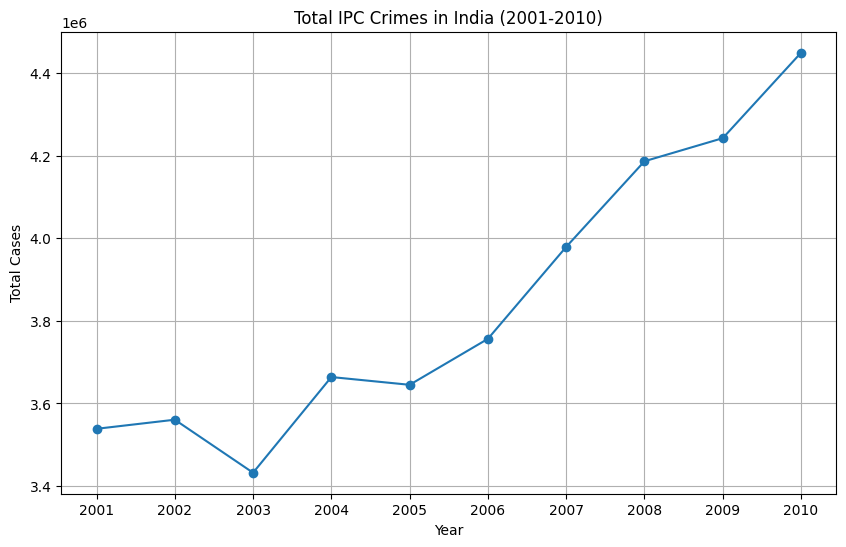

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by year and sum the total cases
total_cases_by_year = crime_df.groupby('YEAR').sum()


plt.figure(figsize=(10, 6))
plt.plot(total_cases_by_year.index, total_cases_by_year['TOTAL IPC CRIMES'], marker='o', linestyle='-')
plt.title('Total IPC Crimes in India (2001-2010)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.xticks(total_cases_by_year.index)
plt.show()


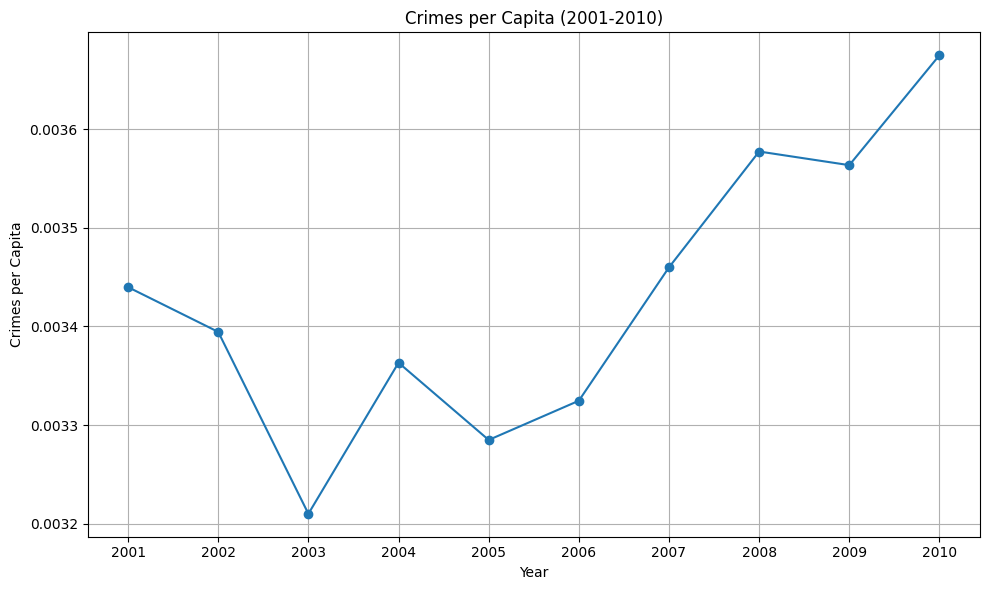

In [ ]:
import matplotlib.pyplot as plt


total_crimes_per_year = crime_df.groupby('YEAR')['TOTAL IPC CRIMES'].sum()


total_population_per_year = india_df.set_index('Year')['Total Population']


total_crimes_per_year.index = total_crimes_per_year.index.astype(int)
total_population_per_year.index = total_population_per_year.index.astype(int)

# Calculating crimes per capita
crimes_per_capita = total_crimes_per_year / total_population_per_year


plt.figure(figsize=(10, 6))
plt.plot(crimes_per_capita.index, crimes_per_capita.values, marker='o', linestyle='-')
plt.title('Crimes per Capita (2001-2010)')
plt.xlabel('Year')
plt.ylabel('Crimes per Capita')
plt.grid(True)
plt.xticks(crimes_per_capita.index)
plt.tight_layout()
plt.show()


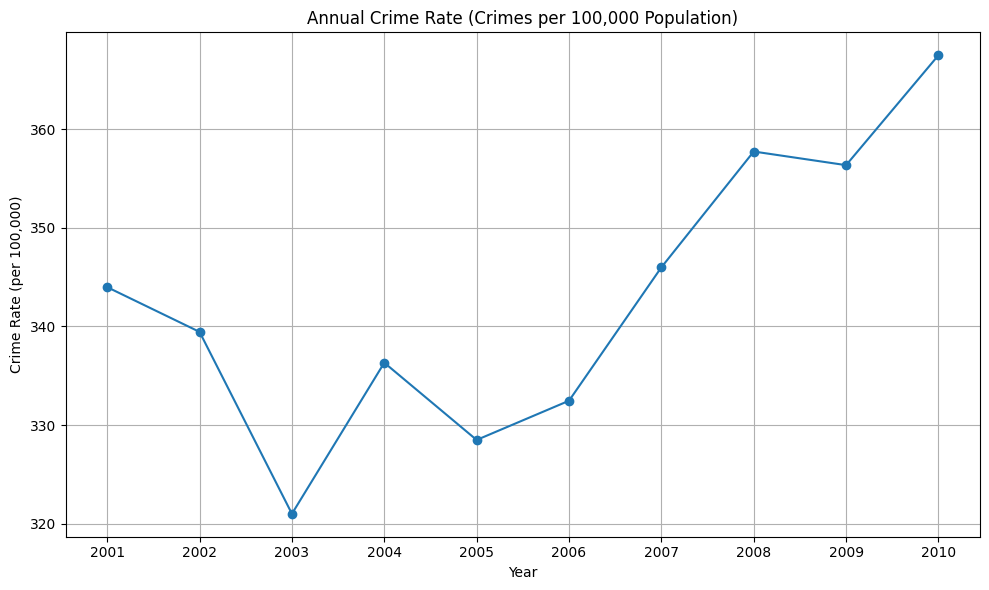

In [ ]:
import matplotlib.pyplot as plt


total_crimes_per_year = crime_df.groupby('YEAR')['TOTAL IPC CRIMES'].sum()


total_population_per_year = india_df.set_index('Year')['Total Population']


total_crimes_per_year.index = total_crimes_per_year.index.astype(int)
total_population_per_year.index = total_population_per_year.index.astype(int)

#Calculate crimes per 100,000 population
crimes_per_capita = (total_crimes_per_year / total_population_per_year) * 100000  # Converting to per 100,000


plt.figure(figsize=(10, 6))
plt.plot(crimes_per_capita.index, crimes_per_capita.values, marker='o', linestyle='-')
plt.title('Annual Crime Rate (Crimes per 100,000 Population)')
plt.xlabel('Year')
plt.ylabel('Crime Rate (per 100,000)')
plt.grid(True)
plt.xticks(crimes_per_capita.index)
plt.tight_layout()
plt.show()


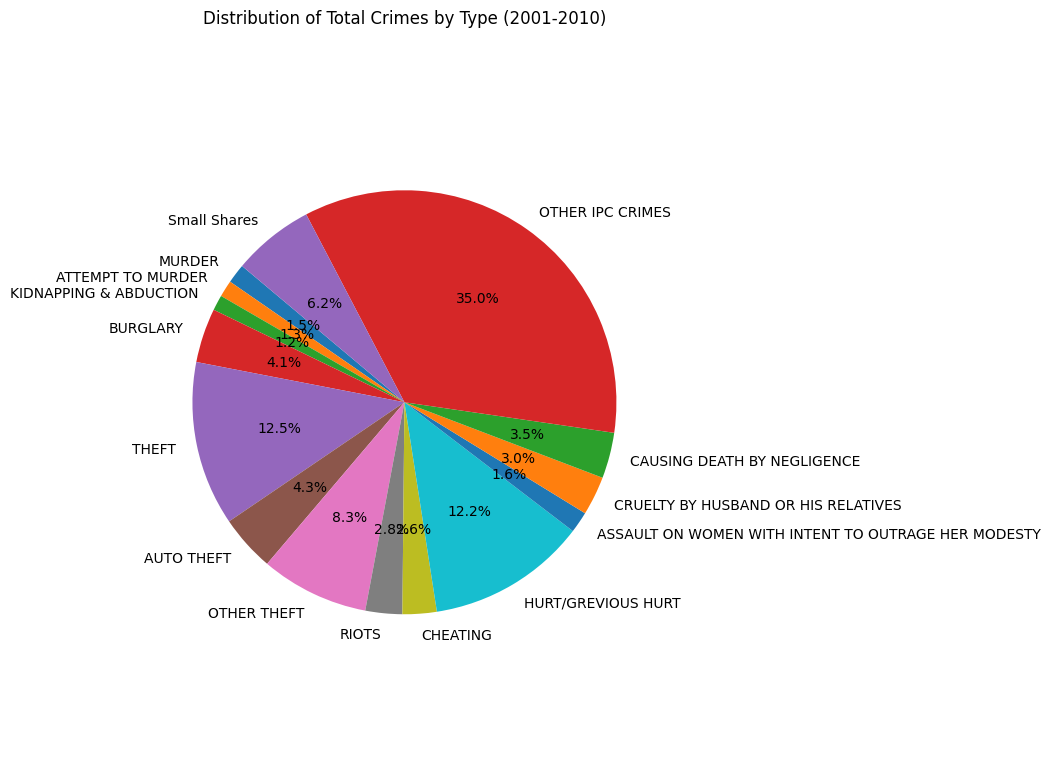

In [ ]:
import matplotlib.pyplot as plt


total_crimes_by_type = crime_df.drop(columns=['STATE', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']).sum()


small_share_threshold = 0.01
small_share_mask = total_crimes_by_type / total_crimes_by_type.sum() < small_share_threshold


small_share_total = total_crimes_by_type[small_share_mask].sum()
total_crimes_by_type = total_crimes_by_type[~small_share_mask]
total_crimes_by_type['Small Shares'] = small_share_total


plt.figure(figsize=(10, 8))
total_crimes_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Crimes by Type (2001-2010)')
plt.axis('equal')
plt.tight_layout()
plt.show()


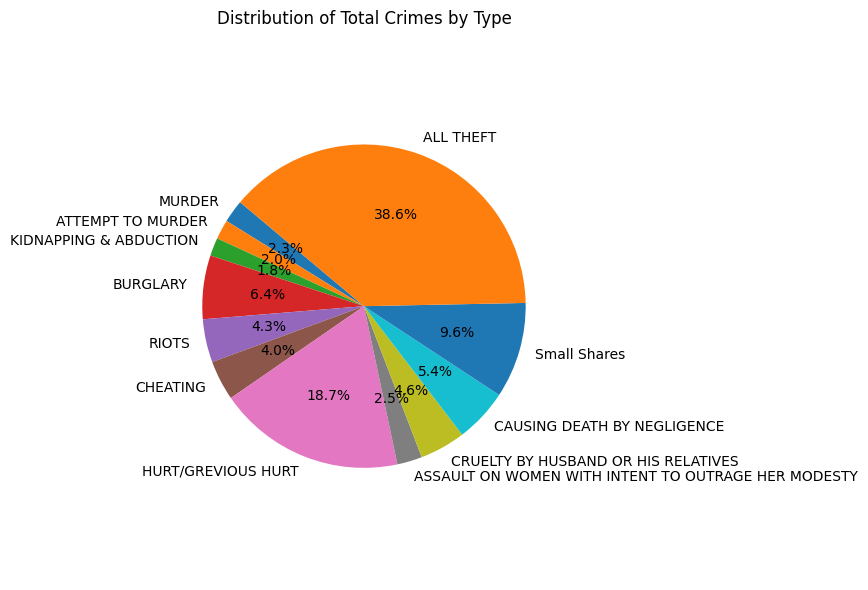

In [ ]:
import matplotlib.pyplot as plt
total_crimes_by_type = crime_df.drop(columns=['STATE', 'DISTRICT', 'YEAR', 'TOTAL IPC CRIMES']).sum()


small_share_threshold = 0.01
small_share_mask = total_crimes_by_type / total_crimes_by_type.sum() < small_share_threshold


small_share_total = total_crimes_by_type[small_share_mask].sum()
total_crimes_by_type = total_crimes_by_type[~small_share_mask]
total_crimes_by_type['Small Shares'] = small_share_total

total_crimes_by_type['ALL THEFT'] = total_crimes_by_type[['THEFT', 'AUTO THEFT', 'OTHER THEFT']].sum()


# Dropping individual theft categories
total_crimes_by_type.drop(['THEFT', 'AUTO THEFT', 'OTHER THEFT','OTHER IPC CRIMES'], inplace=True)


plt.figure(figsize=(8, 6))
total_crimes_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Crimes by Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

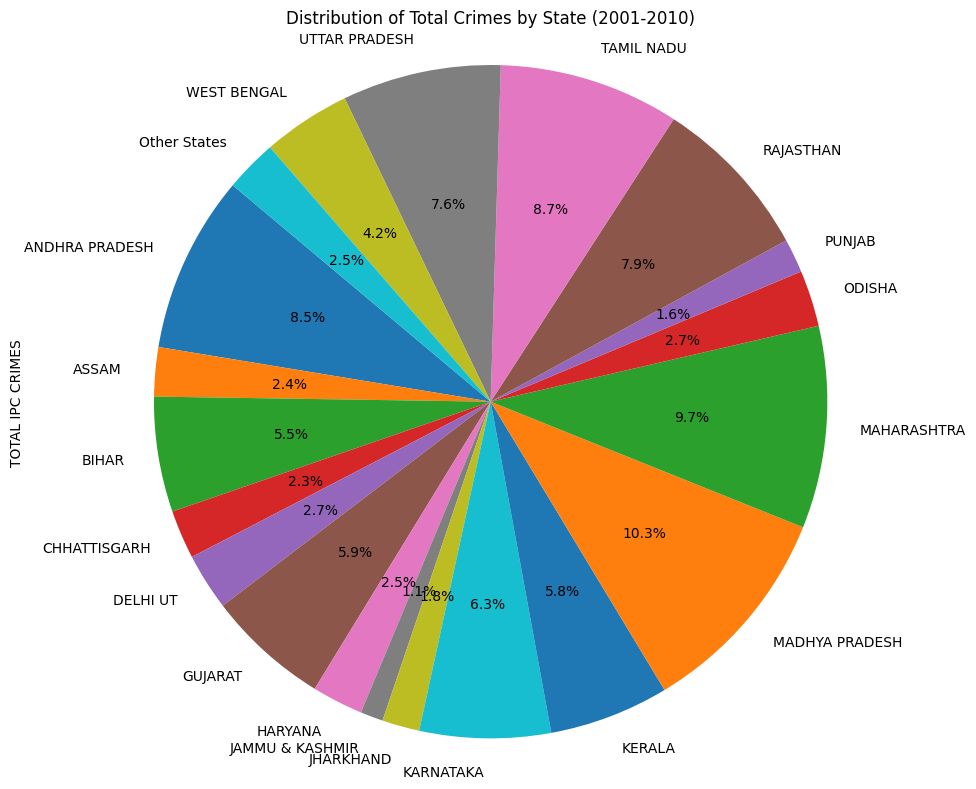

In [ ]:
import matplotlib.pyplot as plt


total_crimes_by_state = crime_df.groupby('STATE')['TOTAL IPC CRIMES'].sum()

total_crimes_percentage = total_crimes_by_state / total_crimes_by_state.sum() * 100
other_states_mask = total_crimes_percentage < 1
other_states_crimes = total_crimes_by_state[other_states_mask].sum()


total_crimes_by_state = total_crimes_by_state[~other_states_mask]
total_crimes_by_state['Other States'] = other_states_crimes


plt.figure(figsize=(10, 8))
total_crimes_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Crimes by State (2001-2010)')
plt.axis('equal')
plt.tight_layout()
plt.show()


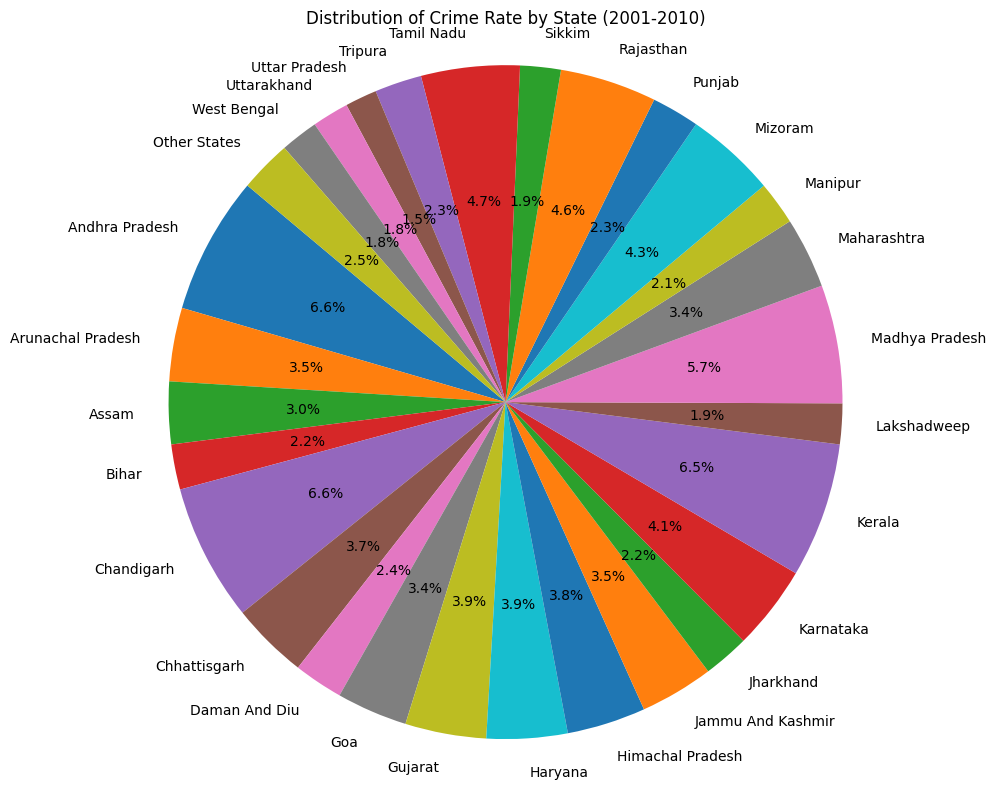

In [ ]:
import matplotlib.pyplot as plt


crime_df_lower = crime_df.copy()


crime_df_lower['STATE'] = crime_df_lower['STATE'].str.lower().str.title()


total_crimes_by_state = crime_df_lower.groupby('STATE')['TOTAL IPC CRIMES'].sum()


total_population_by_state = popu_df.set_index('State').sum(axis=1)




crime_rate_by_state = (total_crimes_by_state / total_population_by_state) * 100000


crime_rate_by_state.index = crime_rate_by_state.index.str.replace('&', 'And')
crime_rate_by_state.index = crime_rate_by_state.index.str.replace('N ', 'N')
crime_rate_by_state.index = crime_rate_by_state.index.str.replace('Delhi Ut', 'Delhi')
crime_rate_by_state.index = crime_rate_by_state.index.str.replace('Orissa', 'Odisha')
crime_rate_by_state.index = crime_rate_by_state.index.str.replace('Pondicherry', 'Puducherry')


crime_rate_by_state = crime_rate_by_state.dropna()


other_states_mask = (crime_rate_by_state / crime_rate_by_state.sum()) < 0.015

other_states_crime_rate = crime_rate_by_state[other_states_mask].sum()
crime_rate_by_state = crime_rate_by_state[~other_states_mask]
crime_rate_by_state['Other States'] = other_states_crime_rate


plt.figure(figsize=(10, 8))
crime_rate_by_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Rate by State (2001-2010)')
plt.axis('equal')
plt.tight_layout()
plt.show()


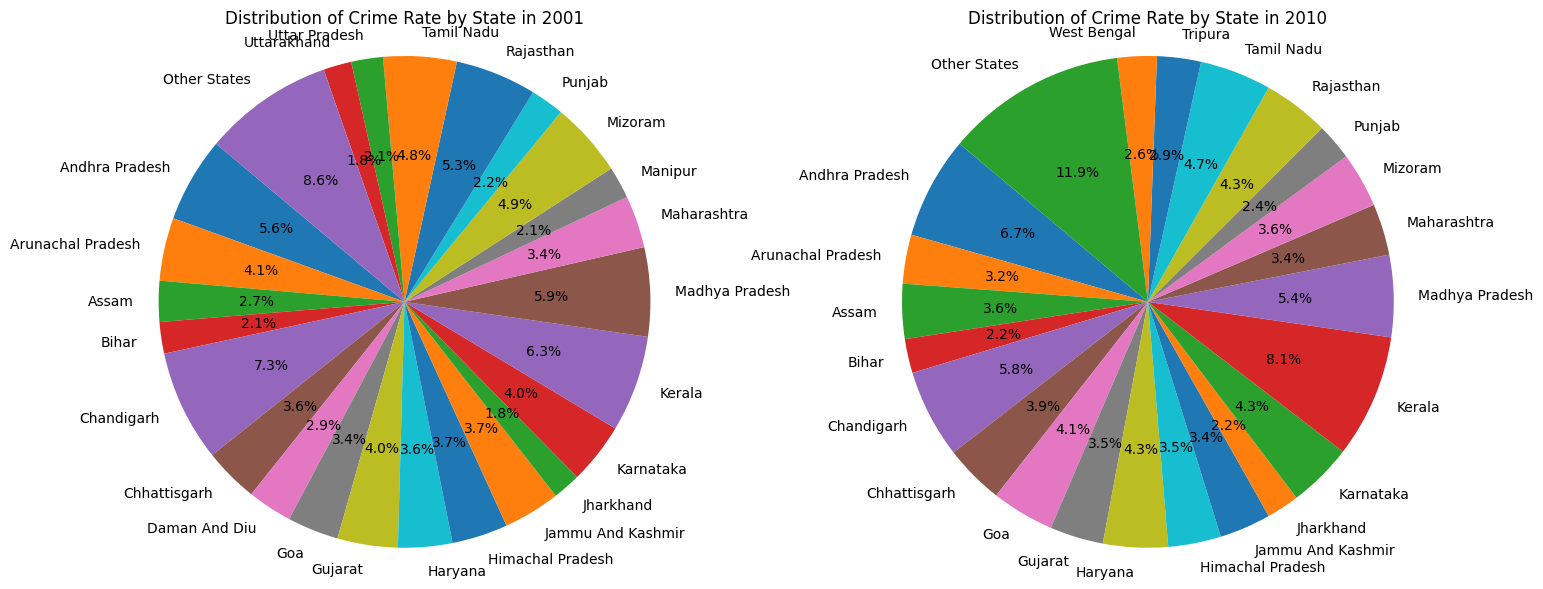

In [ ]:
import matplotlib.pyplot as plt

crime_df_lower = crime_df.copy()

crime_df_lower['STATE'] = crime_df_lower['STATE'].str.lower().str.title()

crime_df_2001 = crime_df_lower[crime_df_lower['YEAR'] == 2001]
crime_df_2010 = crime_df_lower[crime_df_lower['YEAR'] == 2010]

total_crimes_by_state_2001 = crime_df_2001.groupby('STATE')['TOTAL IPC CRIMES'].sum()
total_crimes_by_state_2010 = crime_df_2010.groupby('STATE')['TOTAL IPC CRIMES'].sum()

total_population_by_state_2001 = popu_df.set_index('State')['2001']
total_population_by_state_2010 = popu_df.set_index('State')['2010']

crime_rate_by_state_2001 = (total_crimes_by_state_2001 / total_population_by_state_2001) * 100000
crime_rate_by_state_2010 = (total_crimes_by_state_2010 / total_population_by_state_2010) * 100000

crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('&', 'And')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('N ', 'N')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Delhi Ut', 'Delhi')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Orissa', 'Odisha')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Pondicherry', 'Puducherry')

crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('&', 'And')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('N ', 'N')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Delhi Ut', 'Delhi')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Orissa', 'Odisha')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Pondicherry', 'Puducherry')

crime_rate_by_state_2001 = crime_rate_by_state_2001.dropna()
crime_rate_by_state_2010 = crime_rate_by_state_2010.dropna()

other_states_mask_2001 = (crime_rate_by_state_2001 / crime_rate_by_state_2001.sum()) < 0.018
other_states_mask_2010 = (crime_rate_by_state_2010 / crime_rate_by_state_2010.sum()) < 0.018

other_states_crime_rate_2001 = crime_rate_by_state_2001[other_states_mask_2001].sum()
other_states_crime_rate_2010 = crime_rate_by_state_2010[other_states_mask_2010].sum()

crime_rate_by_state_2001 = crime_rate_by_state_2001[~other_states_mask_2001]
crime_rate_by_state_2010 = crime_rate_by_state_2010[~other_states_mask_2010]

crime_rate_by_state_2001['Other States'] = other_states_crime_rate_2001
crime_rate_by_state_2010['Other States'] = other_states_crime_rate_2010

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(crime_rate_by_state_2001, labels=crime_rate_by_state_2001.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Crime Rate by State in 2001')
axs[0].axis('equal')

axs[1].pie(crime_rate_by_state_2010, labels=crime_rate_by_state_2010.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution of Crime Rate by State in 2010')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


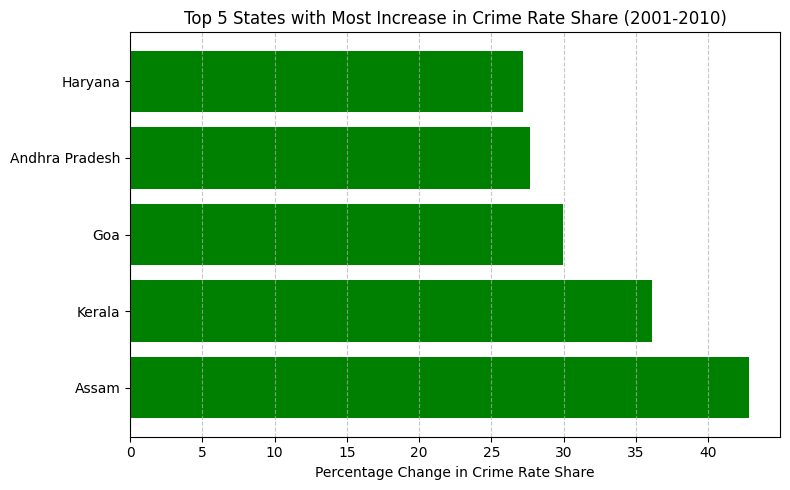

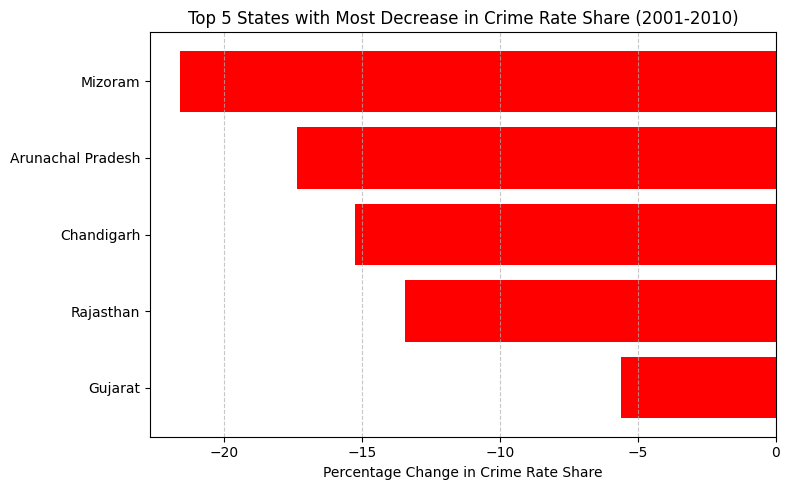

In [ ]:
import matplotlib.pyplot as plt

crime_df_lower = crime_df.copy()

crime_df_lower['STATE'] = crime_df_lower['STATE'].str.lower().str.title()

crime_df_2001 = crime_df_lower[crime_df_lower['YEAR'] == 2001]
crime_df_2010 = crime_df_lower[crime_df_lower['YEAR'] == 2010]

total_crimes_by_state_2001 = crime_df_2001.groupby('STATE')['TOTAL IPC CRIMES'].sum()
total_crimes_by_state_2010 = crime_df_2010.groupby('STATE')['TOTAL IPC CRIMES'].sum()

total_population_by_state_2001 = popu_df.set_index('State')['2001']
total_population_by_state_2010 = popu_df.set_index('State')['2010']

crime_rate_by_state_2001 = (total_crimes_by_state_2001 / total_population_by_state_2001) * 100000
crime_rate_by_state_2010 = (total_crimes_by_state_2010 / total_population_by_state_2010) * 100000

crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('&', 'And')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('N ', 'N')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Delhi Ut', 'Delhi')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Orissa', 'Odisha')
crime_rate_by_state_2001.index = crime_rate_by_state_2001.index.str.replace('Pondicherry', 'Puducherry')

crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('&', 'And')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('N ', 'N')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Delhi Ut', 'Delhi')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Orissa', 'Odisha')
crime_rate_by_state_2010.index = crime_rate_by_state_2010.index.str.replace('Pondicherry', 'Puducherry')

crime_rate_by_state_2001 = crime_rate_by_state_2001.dropna()
crime_rate_by_state_2010 = crime_rate_by_state_2010.dropna()

other_states_mask_2001 = (crime_rate_by_state_2001 / crime_rate_by_state_2001.sum()) < 0.018
other_states_mask_2010 = (crime_rate_by_state_2010 / crime_rate_by_state_2010.sum()) < 0.018

other_states_crime_rate_2001 = crime_rate_by_state_2001[other_states_mask_2001].sum()
other_states_crime_rate_2010 = crime_rate_by_state_2010[other_states_mask_2010].sum()

crime_rate_by_state_2001 = crime_rate_by_state_2001[~other_states_mask_2001]
crime_rate_by_state_2010 = crime_rate_by_state_2010[~other_states_mask_2010]

crime_rate_by_state_2001['Other States'] = other_states_crime_rate_2001
crime_rate_by_state_2010['Other States'] = other_states_crime_rate_2010
crime_rate_percentage_change = ((crime_rate_by_state_2010 - crime_rate_by_state_2001) / crime_rate_by_state_2001) * 100


sorted_percentage_change = crime_rate_percentage_change.sort_values()


top_5_increase = sorted_percentage_change[sorted_percentage_change > 0].drop('Other States').tail(5)


top_5_decrease = sorted_percentage_change.head(5)


plt.figure(figsize=(8, 5))
plt.barh(top_5_increase.index, top_5_increase.values, color='green')
plt.xlabel('Percentage Change in Crime Rate Share')
plt.title('Top 5 States with Most Increase in Crime Rate Share (2001-2010)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest increase at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.barh(top_5_decrease.index, top_5_decrease.values, color='red')
plt.xlabel('Percentage Change in Crime Rate Share')
plt.title('Top 5 States with Most Decrease in Crime Rate Share (2001-2010)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest decrease at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [77]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')


crime_df_st=crime_df.copy()
crime_df_st['STATE'] = crime_df['STATE'].str.lower().str.replace('&', 'and')
crime_df_st = crime_df_st.replace({'odisha': 'orissa'})

# Group by state and find the total crimes
total_crimes_per_state = crime_df_st.groupby('STATE')['TOTAL IPC CRIMES'].sum().reset_index()
# Replace inconsistent state names
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].astype(str)  # Convert STATE column to string
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].str.replace('&', 'And')
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].str.replace('N ', 'N')
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].str.replace('Delhi Ut', 'Delhi')
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].str.replace('Orissa', 'Odisha')
total_crimes_per_state['STATE'] = total_crimes_per_state['STATE'].str.replace('Pondicherry', 'Puducherry')

india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')



# print(total_crimes_per_state)

# Merge the crime data with the shapefile
merged_data = india_map.merge(total_crimes_per_state, how='left', left_on='STATE', right_on='STATE')


fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='TOTAL IPC CRIMES',
                    hover_name='STATE',
                    hover_data={'TOTAL IPC CRIMES': True},
                    color_continuous_scale='Viridis',
                    labels={'TOTAL IPC CRIMES': 'Total Crimes'})

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Total Crimes Heatmap in India', margin={"r": 0, "t": 30, "l": 0, "b": 0})


fig.show()

# Theft

In [ ]:
property_df1 = dfs['PropertyRecovered']
property_df1.head()

Area_Name  Year           Group_Name Sub_Group_Name  \
0  Andaman & Nicobar Islands  2001  Burglary - Property    3. Burglary   
1             Andhra Pradesh  2001  Burglary - Property    3. Burglary   
2          Arunachal Pradesh  2001  Burglary - Property    3. Burglary   
3                      Assam  2001  Burglary - Property    3. Burglary   
4                      Bihar  2001  Burglary - Property    3. Burglary   

   Cases_Property_Recovered  Cases_Property_Stolen  \
0                        27                     64   
1                      3321                   7134   
2                        66                    248   
3                       539                   2423   
4                       367                   3231   

   Value_of_Property_Recovered  Value_of_Property_Stolen  
0                       755858                   1321961  
1                     51483437                 147019348  
2                       825115                   4931904  
3                      3722850                  21466955  
4                      2327135                  17023937

In [ ]:
property_df2 = dfs['AutoTheft']
property_df2.head()

Area_Name  Year                  Group_Name  \
0  Andaman & Nicobar Islands  2001  AT1-Motor Cycles/ Scooters   
1             Andhra Pradesh  2001  AT1-Motor Cycles/ Scooters   
2          Arunachal Pradesh  2001  AT1-Motor Cycles/ Scooters   
3                      Assam  2001  AT1-Motor Cycles/ Scooters   
4                      Bihar  2001  AT1-Motor Cycles/ Scooters   

              Sub_Group_Name  Auto_Theft_Coordinated/Traced  \
0  1. Motor Cycles/ Scooters                            NaN   
1  1. Motor Cycles/ Scooters                          136.0   
2  1. Motor Cycles/ Scooters                            0.0   
3  1. Motor Cycles/ Scooters                            0.0   
4  1. Motor Cycles/ Scooters                           44.0   

   Auto_Theft_Recovered  Auto_Theft_Stolen  
0                   4.0                  4  
1                1311.0               2725  
2                  21.0                 27  
3                  94.0                205  
4                 205.0                946

In [ ]:
property_df3 = dfs['PropertyStolenOfProperty']
property_df3.head()

Area_Name  Year         Group_Name Sub_Group_Name  \
0  Andaman & Nicobar Islands  2001  Cattle - Property      2. Cattle   
1             Andhra Pradesh  2001  Cattle - Property      2. Cattle   
2          Arunachal Pradesh  2001  Cattle - Property      2. Cattle   
3                      Assam  2001  Cattle - Property      2. Cattle   
4                      Bihar  2001  Cattle - Property      2. Cattle   

   Cases_Property_Recovered  Cases_Property_Stolen  \
0                         0                      1   
1                       448                    580   
2                        22                     34   
3                       149                    322   
4                       144                    334   

   Value_of_Property_Recovered  Value_of_Property_Stolen  
0                            0                      1000  
1                      6490596                   7233876  
2                       135500                    704500  
3                       683350                   1816386  
4                       896019                   1911068

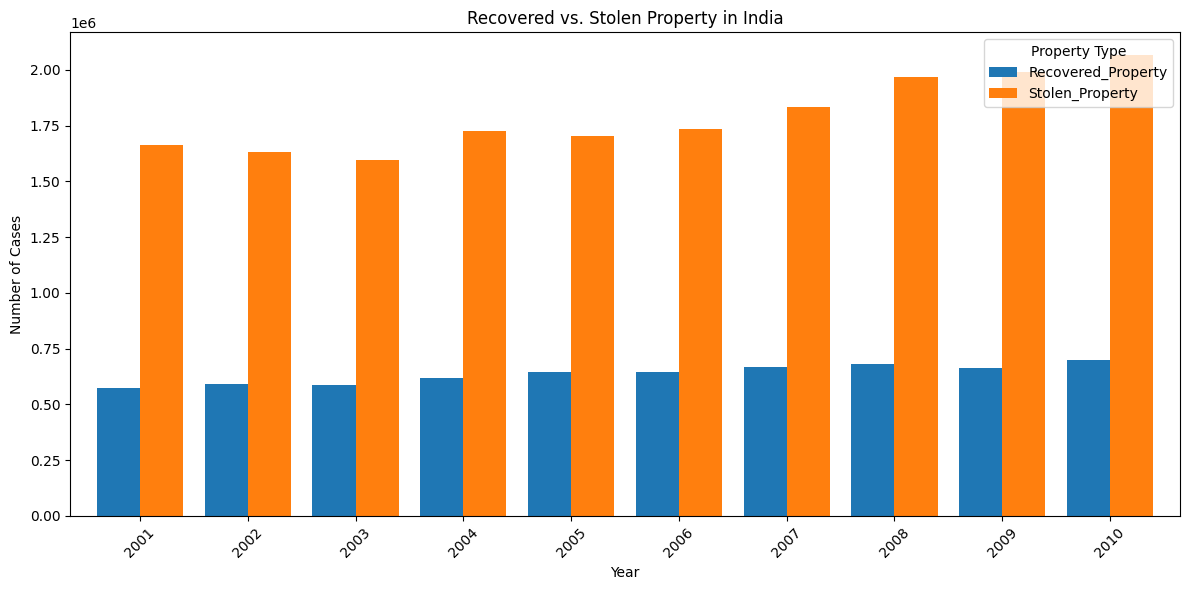

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_recovered_vs_stolen(df1, df2, df3):

    df = pd.concat([df1, df2, df3])

    # Group by year and sum cases
    theft_by_year = df.groupby('Year').agg(
        Recovered_Property=('Cases_Property_Recovered', 'sum'),
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        # Recovered_Auto=('Auto_Theft_Recovered', 'sum'),
        # Stolen_Auto=('Auto_Theft_Stolen', 'sum')
    )

    # Plot Grouped Bar Chart
    ax = theft_by_year.plot(kind='bar', figsize=(12, 6), width=0.8)


    plt.title("Recovered vs. Stolen Property in India")
    plt.xlabel("Year")
    plt.ylabel("Number of Cases")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.legend(title="Property Type",loc='upper right')  # Add legend title
    plt.tight_layout()
    plt.show()


plot_recovered_vs_stolen(property_df1, property_df2, property_df3)


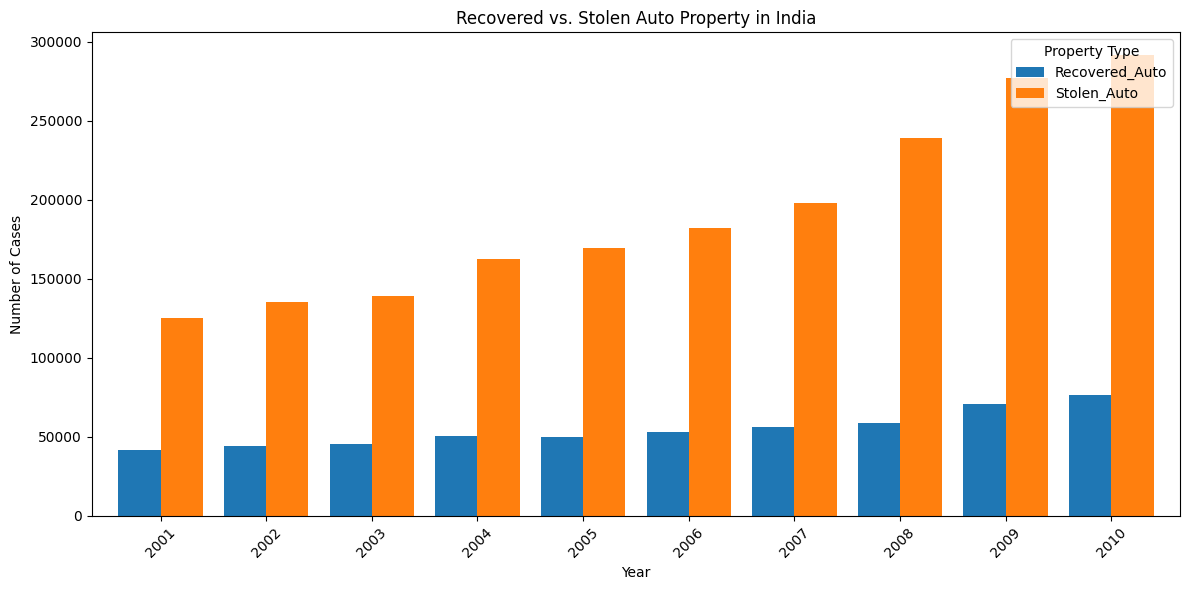

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_recovered_vs_stolen(df1, df2, df3):

    df = pd.concat([df1, df2, df3])

    # Group by year and sum cases
    theft_by_year = df.groupby('Year').agg(
        # Recovered_Property=('Cases_Property_Recovered', 'sum'),
        # Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Auto=('Auto_Theft_Recovered', 'sum'),
        Stolen_Auto=('Auto_Theft_Stolen', 'sum')
    )

    # Plot Grouped Bar Chart
    ax = theft_by_year.plot(kind='bar', figsize=(12, 6), width=0.8)


    plt.title("Recovered vs. Stolen Auto Property in India")
    plt.xlabel("Year")
    plt.ylabel("Number of Cases")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.legend(title="Property Type",loc='upper right')  # Add legend title
    plt.tight_layout()
    plt.show()


plot_recovered_vs_stolen(property_df1, property_df2, property_df3)


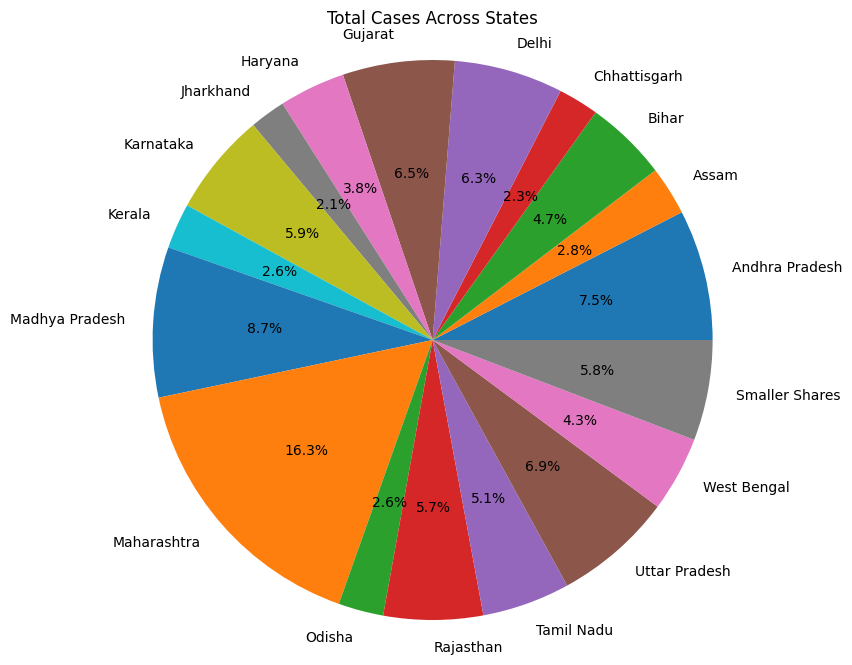

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_total_cases_pie_chart(df1, df2, df3):

    df = pd.concat([df1, df2, df3])

    # Group by state and sum cases
    total_cases_per_state = df.groupby('Area_Name')['Cases_Property_Stolen'].sum().reset_index()


    total_cases = total_cases_per_state['Cases_Property_Stolen'].sum()
    total_cases_per_state['Percentage'] = total_cases_per_state['Cases_Property_Stolen'] / total_cases * 100


    # excluded_states = ['Union Territory', 'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
    #                   'Daman & Diu', 'Lakshadweep', 'Puducherry']
    excluded_states=[]
    total_cases_per_state_filtered = total_cases_per_state[
        (~total_cases_per_state['Area_Name'].isin(excluded_states)) &
        (total_cases_per_state['Percentage'] >= 2)
    ]

    # Calculate smaller shares
    smaller_shares_percentage = total_cases_per_state[total_cases_per_state['Percentage'] < 2]['Percentage'].sum()


    smaller_shares_df = pd.DataFrame({
        'Area_Name': ['Smaller Shares'],
        'Percentage': [smaller_shares_percentage]
    })


    total_cases_per_state_filtered = pd.concat([total_cases_per_state_filtered, smaller_shares_df])

    plt.figure(figsize=(10, 8))
    plt.pie(total_cases_per_state_filtered['Percentage'],
            labels=total_cases_per_state_filtered['Area_Name'],
            autopct='%1.1f%%')
    plt.title('Total Cases Across States')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_total_cases_pie_chart(property_df1, property_df2, property_df3)


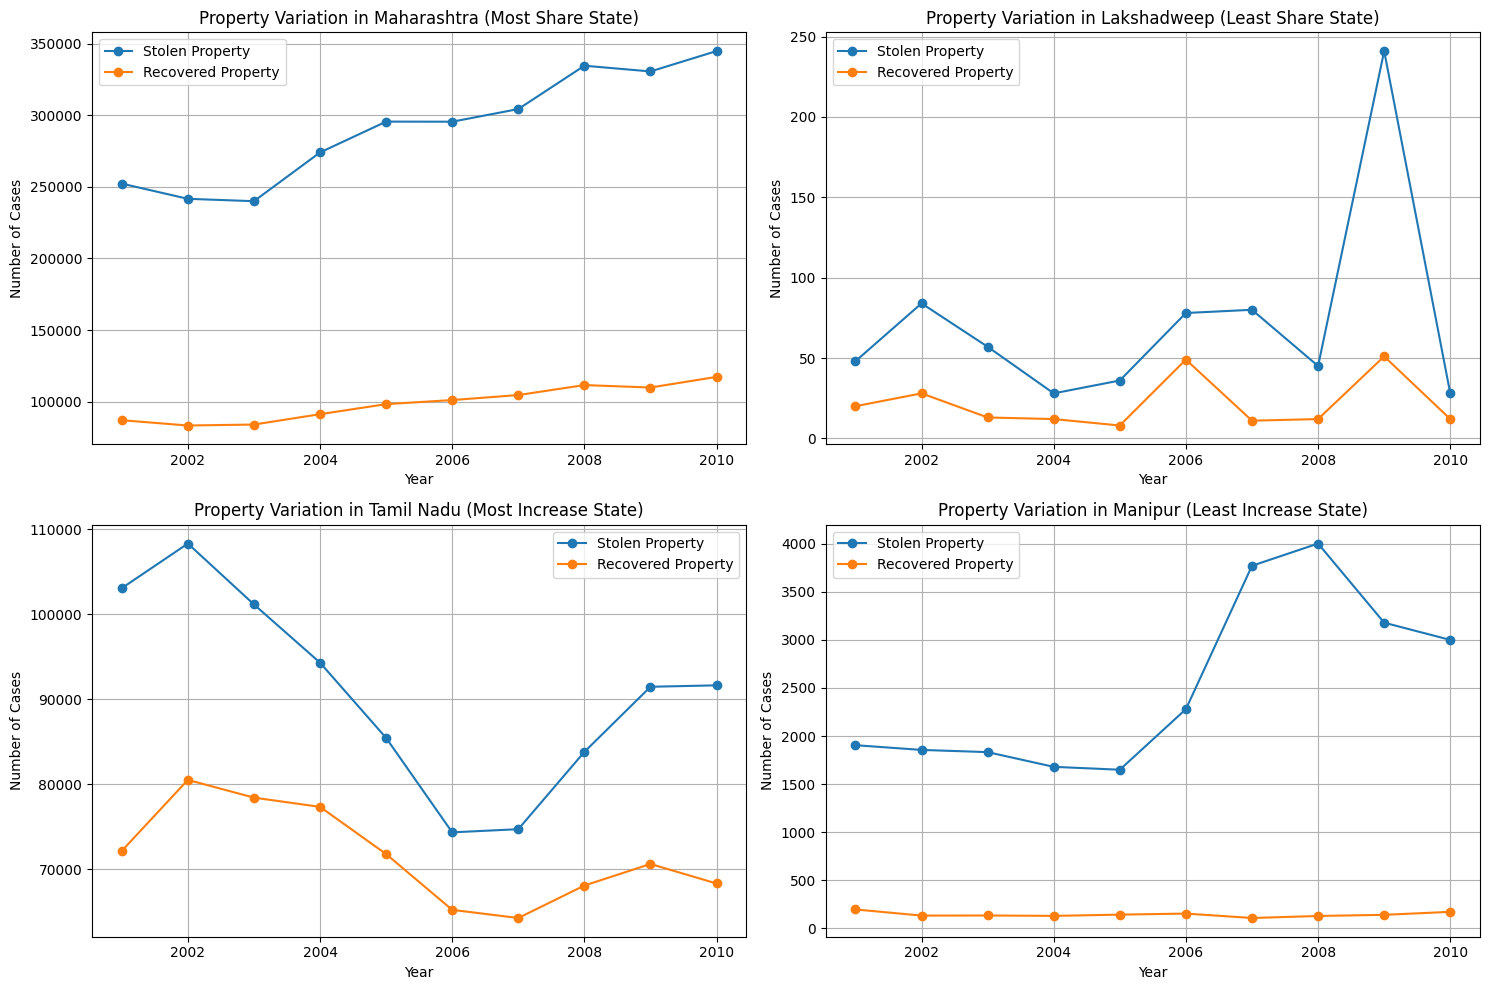

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_most_share_state(df1, df2, df3):
    df = pd.concat([df1, df2, df3])

    # Group by year and state and sum cases
    total_cases_per_state_year = df.groupby(['Year', 'Area_Name']).agg(
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Property=('Cases_Property_Recovered', 'sum')
    ).reset_index()


    total_stolen_per_state = total_cases_per_state_year.groupby('Area_Name')['Stolen_Property'].sum()
    most_share_state = total_stolen_per_state.idxmax()

    # Plot line chart for most share state
    state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == most_share_state]
    return state_data

def plot_least_share_state(df1, df2, df3):

    df = pd.concat([df1, df2, df3])


    total_cases_per_state_year = df.groupby(['Year', 'Area_Name']).agg(
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Property=('Cases_Property_Recovered', 'sum')
    ).reset_index()


    total_stolen_per_state = total_cases_per_state_year.groupby('Area_Name')['Stolen_Property'].sum()
    least_share_state = total_stolen_per_state.idxmin()

    # Plot line chart for least share state
    state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == least_share_state]
    return state_data

def plot_most_increase_state(df1, df2, df3):

    df = pd.concat([df1, df2, df3])

    # Group by year and state and sum cases
    total_cases_per_state_year = df.groupby(['Year', 'Area_Name']).agg(
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Property=('Cases_Property_Recovered', 'sum')
    ).reset_index()


    total_stolen_per_state = total_cases_per_state_year.groupby('Area_Name')['Stolen_Property'].sum()
    total_recovered_per_state = total_cases_per_state_year.groupby('Area_Name')['Recovered_Property'].sum()
    increase_percentage = (total_recovered_per_state - total_stolen_per_state) / total_stolen_per_state
    most_increase_state = increase_percentage.idxmax()

    # Plot line chart for most increase state
    state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == most_increase_state]
    return state_data

def plot_least_increase_state(df1, df2, df3):

    df = pd.concat([df1, df2, df3])

    # Group by year and state and sum cases
    total_cases_per_state_year = df.groupby(['Year', 'Area_Name']).agg(
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Property=('Cases_Property_Recovered', 'sum')
    ).reset_index()


    total_stolen_per_state = total_cases_per_state_year.groupby('Area_Name')['Stolen_Property'].sum()
    total_recovered_per_state = total_cases_per_state_year.groupby('Area_Name')['Recovered_Property'].sum()
    increase_percentage = (total_recovered_per_state - total_stolen_per_state) / total_stolen_per_state
    least_increase_state = increase_percentage.idxmin()

    # Plot line chart for least increase state
    state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == least_increase_state]
    return state_data

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Most Share State
state_data = plot_most_share_state(property_df1, property_df2, property_df3)
axs[0, 0].plot(state_data['Year'], state_data['Stolen_Property'], marker='o', label='Stolen Property')
axs[0, 0].plot(state_data['Year'], state_data['Recovered_Property'], marker='o', label='Recovered Property')
axs[0, 0].set_title(f'Property Variation in {state_data["Area_Name"].iloc[0]} (Most Share State)')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Cases')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Least Share State
state_data = plot_least_share_state(property_df1, property_df2, property_df3)
axs[0, 1].plot(state_data['Year'], state_data['Stolen_Property'], marker='o', label='Stolen Property')
axs[0, 1].plot(state_data['Year'], state_data['Recovered_Property'], marker='o', label='Recovered Property')
axs[0, 1].set_title(f'Property Variation in {state_data["Area_Name"].iloc[0]} (Least Share State)')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Number of Cases')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot 3: Most Increase State
state_data = plot_most_increase_state(property_df1, property_df2, property_df3)
axs[1, 0].plot(state_data['Year'], state_data['Stolen_Property'], marker='o', label='Stolen Property')
axs[1, 0].plot(state_data['Year'], state_data['Recovered_Property'], marker='o', label='Recovered Property')
axs[1, 0].set_title(f'Property Variation in {state_data["Area_Name"].iloc[0]} (Most Increase State)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Cases')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot 4: Least Increase State
state_data = plot_least_increase_state(property_df1, property_df2, property_df3)
axs[1, 1].plot(state_data['Year'], state_data['Stolen_Property'], marker='o', label='Stolen Property')
axs[1, 1].plot(state_data['Year'], state_data['Recovered_Property'], marker='o', label='Recovered Property')
axs[1, 1].set_title(f'Property Variation in {state_data["Area_Name"].iloc[0]} (Least Increase State)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Cases')
axs[1, 1].legend()
axs[1, 1].grid(True)
plt.tight_layout()
plt.show()




In [ ]:
!pip install mapclassify


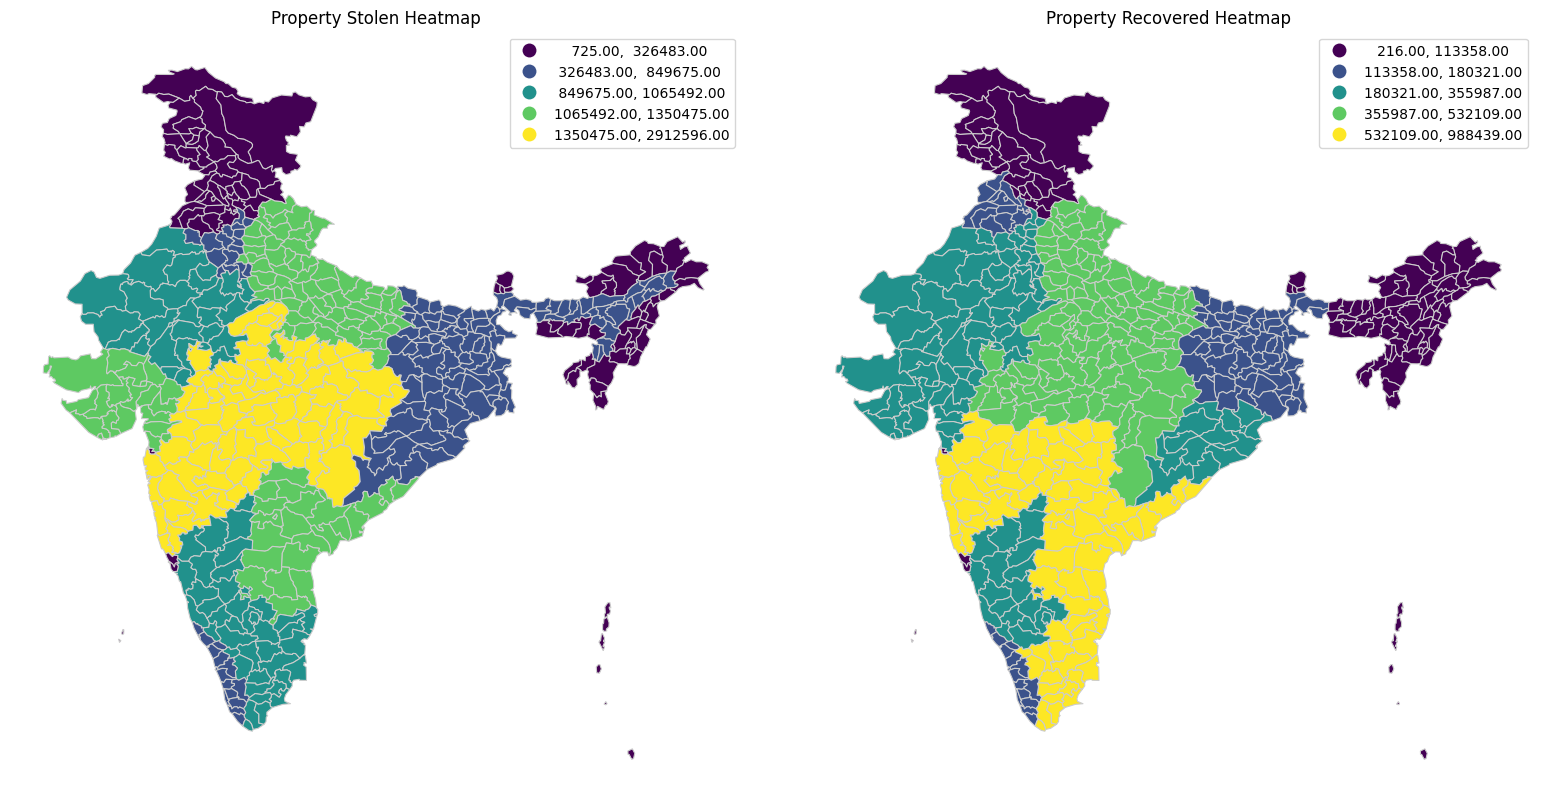

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')


df = pd.concat([property_df1, property_df2, property_df3])


df['Area_Name'] = df['Area_Name'].str.lower().str.replace('&', 'and')
india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')


df['Area_Name'] = df['Area_Name'].replace({'odisha': 'orissa'})

# Group by state and sum cases
total_cases_per_state = df.groupby('Area_Name').agg(
    Stolen_Property=('Cases_Property_Stolen', 'sum'),
    Recovered_Property=('Cases_Property_Recovered', 'sum')
).reset_index()


merged_data = india_map.merge(total_cases_per_state, how='left', left_on='STATE', right_on='Area_Name')


fig, axs = plt.subplots(1, 2, figsize=(16, 8))

merged_data.plot(column='Stolen_Property', cmap='viridis', linewidth=0.8, edgecolor='0.8', legend=True, ax=axs[0], scheme='quantiles')
axs[0].set_title('Property Stolen Heatmap')
axs[0].axis('off')

merged_data.plot(column='Recovered_Property', cmap='viridis', linewidth=0.8, edgecolor='0.8', legend=True, ax=axs[1], scheme='quantiles')
axs[1].set_title('Property Recovered Heatmap')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')


df = pd.concat([property_df1, property_df2, property_df3])

# Preprocessing state names to ensure consistency
df['Area_Name'] = df['Area_Name'].str.lower().str.replace('&', 'and')
india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')


df['Area_Name'] = df['Area_Name'].replace({'odisha': 'orissa'})

# Group by state and sum cases
total_cases_per_state = df.groupby('Area_Name').agg(
    Stolen_Property=('Cases_Property_Stolen', 'sum'),
    Recovered_Property=('Cases_Property_Recovered', 'sum')
).reset_index()


merged_data = india_map.merge(total_cases_per_state, how='left', left_on='STATE', right_on='Area_Name')


fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='Stolen_Property',
                    hover_name='Area_Name',
                    hover_data={'Stolen_Property': True},
                    color_continuous_scale='Viridis',
                    labels={'Stolen_Property':'Stolen Property'})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Property Stolen Heatmap', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


In [ ]:

fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='Recovered_Property',
                    hover_name='Area_Name',
                    hover_data={'Recovered_Property': True},
                    color_continuous_scale='Viridis',
                    labels={'Recovered_Property':'Recovered Property'})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Property Recovered Heatmap', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


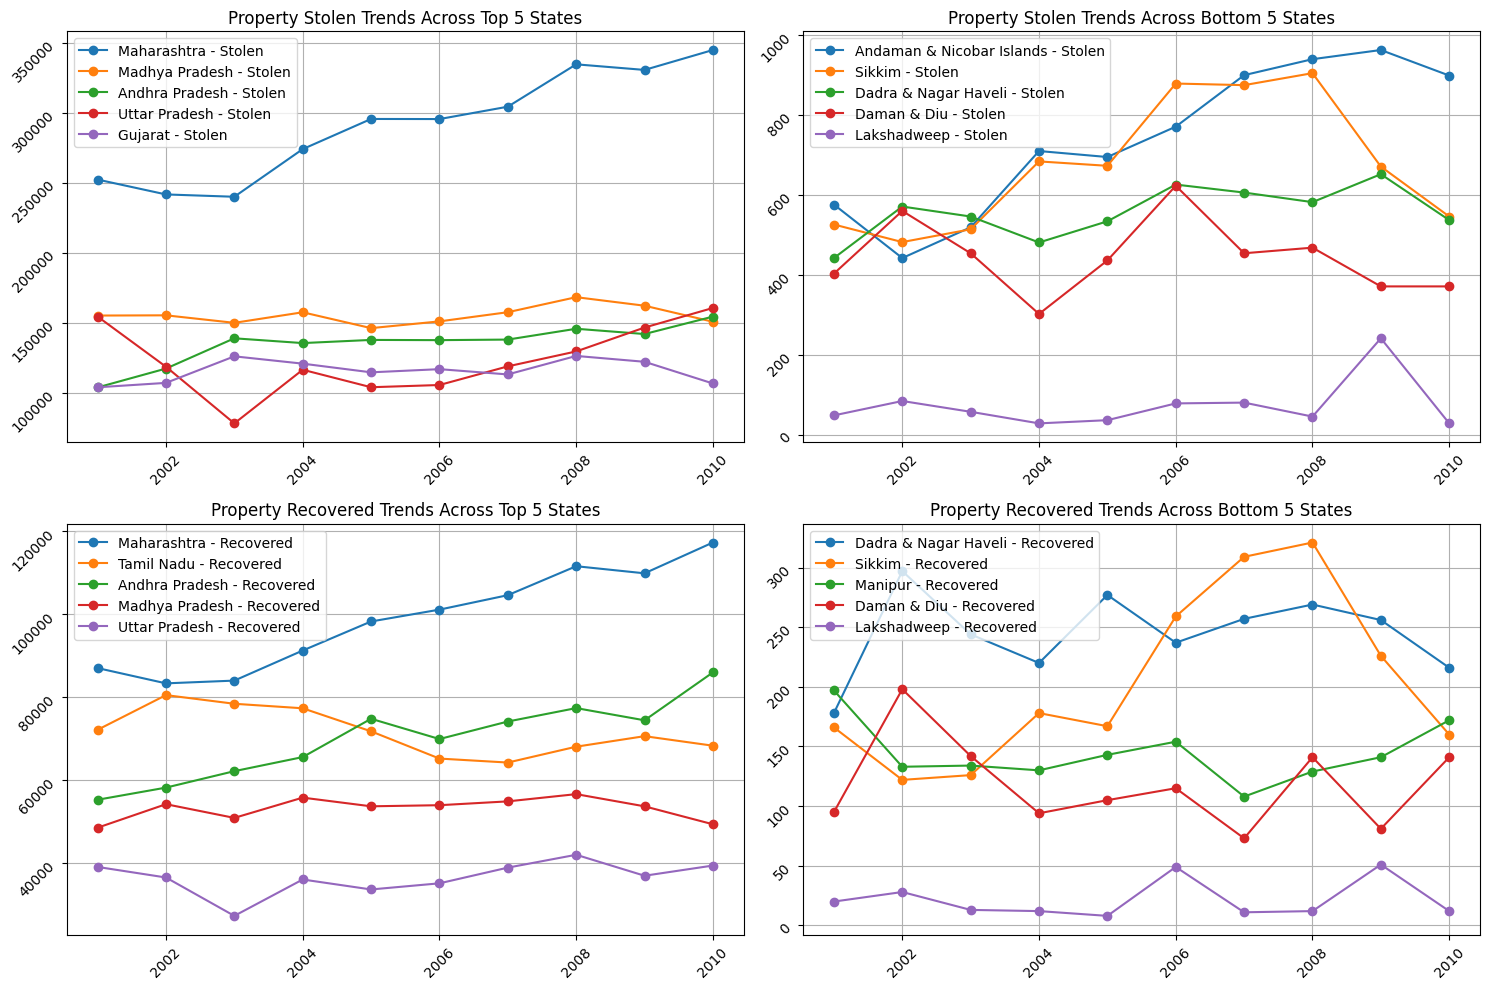

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_property_trends(df1, df2, df3):

    df = pd.concat([df1, df2, df3])


    property_trends = df.groupby(['Area_Name', 'Year']).agg(
        Stolen_Property=('Cases_Property_Stolen', 'sum'),
        Recovered_Property=('Cases_Property_Recovered', 'sum')
    ).reset_index()


    total_cases_per_state_year = property_trends.groupby(['Area_Name', 'Year']).agg(
        Total_Stolen=('Stolen_Property', 'sum'),
        Total_Recovered=('Recovered_Property', 'sum')
    ).reset_index()


    total_cases_per_state = total_cases_per_state_year.groupby('Area_Name').agg(
        Total_Stolen=('Total_Stolen', 'sum'),
        Total_Recovered=('Total_Recovered', 'sum')
    ).reset_index()
    total_cases_per_state.sort_values(by='Total_Stolen', ascending=False, inplace=True)

    # Getting top and bottom 5 states for stolen property
    top_5_stolen = total_cases_per_state.head(5)
    bottom_5_stolen = total_cases_per_state.tail(5)

    # Getting top and bottom 5 states for recovered property
    total_cases_per_state.sort_values(by='Total_Recovered', ascending=False, inplace=True)
    top_5_recovered = total_cases_per_state.head(5)
    bottom_5_recovered = total_cases_per_state.tail(5)


    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plotting top 5 stolen property
    axes[0, 0].set_title('Property Stolen Trends Across Top 5 States')
    for state in top_5_stolen['Area_Name']:
        state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == state]
        axes[0, 0].plot(state_data['Year'], state_data['Total_Stolen'], label=f"{state} - Stolen", marker='o')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    axes[0, 0].tick_params(rotation=45)

    # Plotting bottom 5 stolen property
    axes[0, 1].set_title('Property Stolen Trends Across Bottom 5 States')
    for state in bottom_5_stolen['Area_Name']:
        state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == state]
        axes[0, 1].plot(state_data['Year'], state_data['Total_Stolen'], label=f"{state} - Stolen", marker='o')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    axes[0, 1].tick_params(rotation=45)

    # Plotting top 5 recovered property
    axes[1, 0].set_title('Property Recovered Trends Across Top 5 States')
    for state in top_5_recovered['Area_Name']:
        state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == state]
        axes[1, 0].plot(state_data['Year'], state_data['Total_Recovered'], label=f"{state} - Recovered", marker='o')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    axes[1, 0].tick_params(rotation=45)

    # Plotting bottom 5 recovered property
    axes[1, 1].set_title('Property Recovered Trends Across Bottom 5 States')
    for state in bottom_5_recovered['Area_Name']:
        state_data = total_cases_per_state_year[total_cases_per_state_year['Area_Name'] == state]
        axes[1, 1].plot(state_data['Year'], state_data['Total_Recovered'], label=f"{state} - Recovered", marker='o')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    axes[1, 1].tick_params(rotation=45)

    plt.tight_layout()
    plt.show()


plot_property_trends(property_df1, property_df2, property_df3)


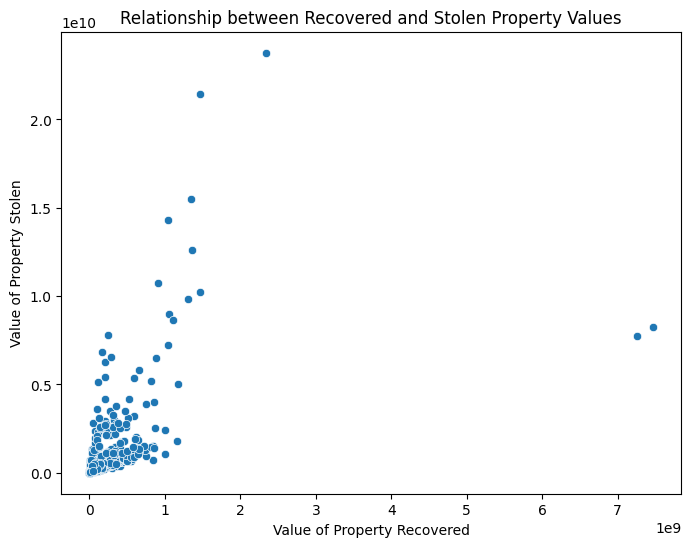

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Value_of_Property_Recovered", y="Value_of_Property_Stolen", data=property_df3)
plt.title("Relationship between Recovered and Stolen Property Values")
plt.xlabel("Value of Property Recovered")
plt.ylabel("Value of Property Stolen")
plt.show()


In [ ]:
import plotly.express as px

# Pivoting the dataframe to create a heatmap data
heatmap_data = property_df1.pivot_table(index="Year", columns="Sub_Group_Name", values="Cases_Property_Recovered")

fig = px.imshow(heatmap_data,
                labels=dict(x="Sub-Group Name", y="Year", color="Cases Property Recovered"),
                color_continuous_scale='Viridis')  # Change color scale if needed
fig.update_layout(title="Cases of Property Recovered Across Years and Sub-Groups",
                  xaxis_nticks=len(property_df1["Sub_Group_Name"].unique()))
fig.show()


# Murder

In [88]:
murder_df = dfs['MurderSex']
murder_df.head(5)

Area_Name  Year               Group_Name  \
0  Andaman & Nicobar Islands  2001  Murder - Female Victims   
1             Andhra Pradesh  2001  Murder - Female Victims   
2          Arunachal Pradesh  2001  Murder - Female Victims   
3                      Assam  2001  Murder - Female Victims   
4                      Bihar  2001  Murder - Female Victims   

      Sub_Group_Name  Victims_Above_50_Yrs  Victims_Total  \
0  2. Female Victims                   NaN              6   
1  2. Female Victims                  67.0            607   
2  2. Female Victims                   2.0             16   
3  2. Female Victims                  11.0            128   
4  2. Female Victims                  12.0            366   

   Victims_Upto_10_15_Yrs  Victims_Upto_10_Yrs  Victims_Upto_15_18_Yrs  \
0                     NaN                  NaN                     NaN   
1                    15.0                 38.0                    43.0   
2                     0.0                  0.0                     0.0   
3                     8.0                  4.0                    23.0   
4                     0.0                  0.0                    40.0   

   Victims_Upto_18_30_Yrs  Victims_Upto_30_50_Yrs  
0                     4.0                     2.0  
1                   269.0                   175.0  
2                    10.0                     4.0  
3                    45.0                    37.0  
4                   191.0                   123.0

In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Load India map shapefile
india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')

# Preprocessing state names to ensure consistency
india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')
murder_df['Area_Name'] = murder_df['Area_Name'].str.lower().str.replace('&', 'and')
murder_df['Area_Name'] = murder_df['Area_Name'].replace({'odisha': 'orissa'})

# Merge data with India map
merged_data = india_map.merge(murder_df.groupby('Area_Name')['Victims_Total'].sum().reset_index(),
                              how='left', left_on='STATE', right_on='Area_Name')


# Plot chloropleth map
fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='Victims_Total',
                    hover_name='STATE',
                    hover_data={'Victims_Total': True},
                    color_continuous_scale='Viridis',
                    labels={'Victims_Total':'Total Murder Victims'})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Murder Victims Heatmap in India', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


In [ ]:
import plotly.graph_objs as go

murder_df['Year'] = pd.to_datetime(murder_df['Year'], format='%Y')

fig = go.Figure()

for state in murder_df['Area_Name'].unique():
    df_state = murder_df[murder_df['Area_Name'] == state]
    fig.add_trace(go.Scatter(x=df_state['Year'], y=df_state['Victims_Total'], mode='lines', name=state))

fig.update_layout(title='Murder Victims Over the Years (Animated)',
                  xaxis_title='Year',
                  yaxis_title='Number of Murder Victims',
                  xaxis=dict(type='date'),
                  yaxis=dict(type='linear'),
                  template='plotly_dark')

fig.show()


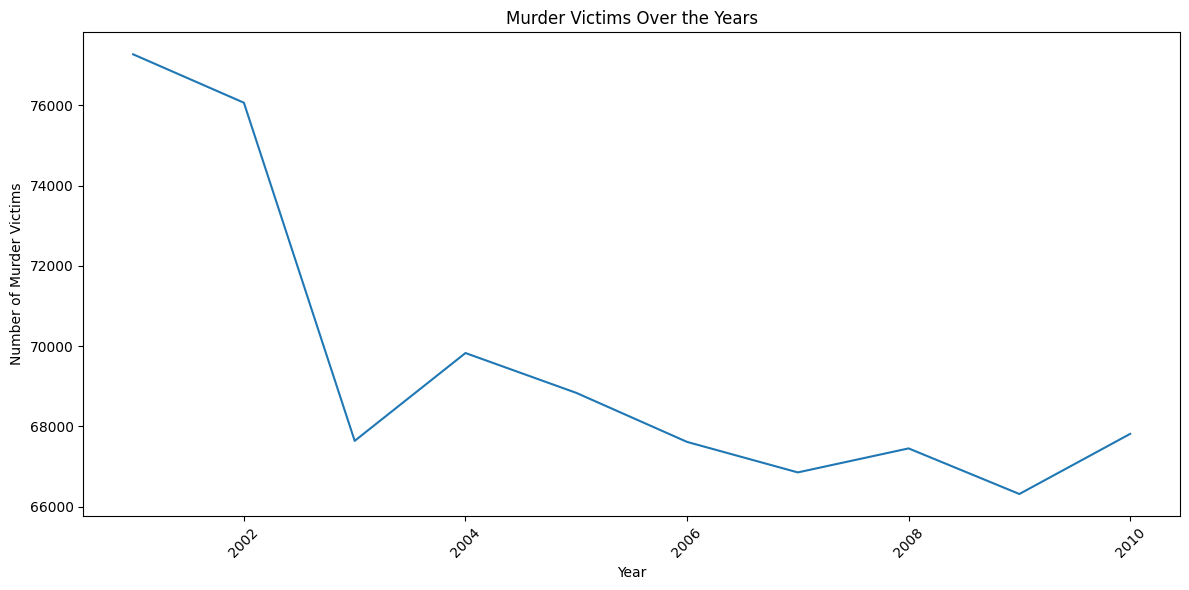

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
murder_df_grouped = murder_df.groupby('Year')['Victims_Total'].sum().reset_index()
sns.lineplot(data=murder_df_grouped, x='Year', y='Victims_Total')
plt.title('Murder Victims Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Murder Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


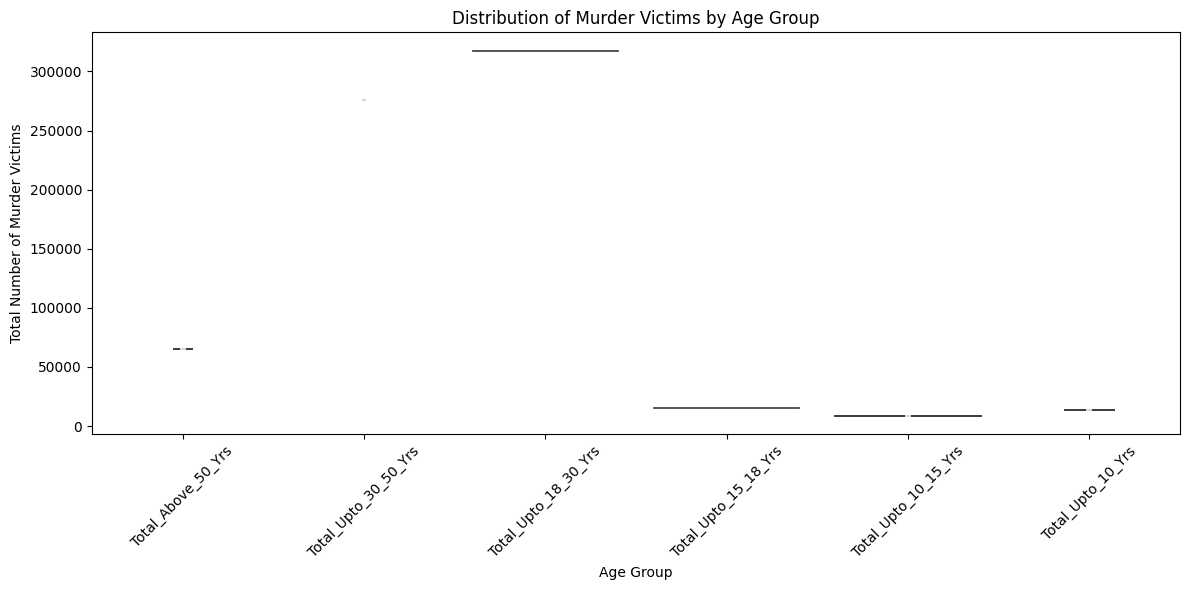

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the number of murder victims separately for each age category
murder_df['Total_Above_50_Yrs'] = murder_df['Victims_Above_50_Yrs'].sum()
murder_df['Total_Upto_30_50_Yrs'] = murder_df['Victims_Upto_30_50_Yrs'].sum()
murder_df['Total_Upto_18_30_Yrs'] = murder_df['Victims_Upto_18_30_Yrs'].sum()
murder_df['Total_Upto_15_18_Yrs'] = murder_df['Victims_Upto_15_18_Yrs'].sum()
murder_df['Total_Upto_10_15_Yrs'] = murder_df['Victims_Upto_10_15_Yrs'].sum()
murder_df['Total_Upto_10_Yrs'] = murder_df['Victims_Upto_10_Yrs'].sum()

# Create a new DataFrame containing the total number of victims in each age group
total_victims_df = murder_df[['Total_Above_50_Yrs', 'Total_Upto_30_50_Yrs', 'Total_Upto_18_30_Yrs',
                              'Total_Upto_15_18_Yrs', 'Total_Upto_10_15_Yrs', 'Total_Upto_10_Yrs']].copy()

# Melt the DataFrame to long-form format
total_victims_df = total_victims_df.melt(value_name='Total_Victims', var_name='Age_Group')

# Create violin plot showing distribution of total number of victims in each age group
plt.figure(figsize=(12, 6))
sns.violinplot(data=total_victims_df, x='Age_Group', y='Total_Victims')
plt.title('Distribution of Murder Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Murder Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


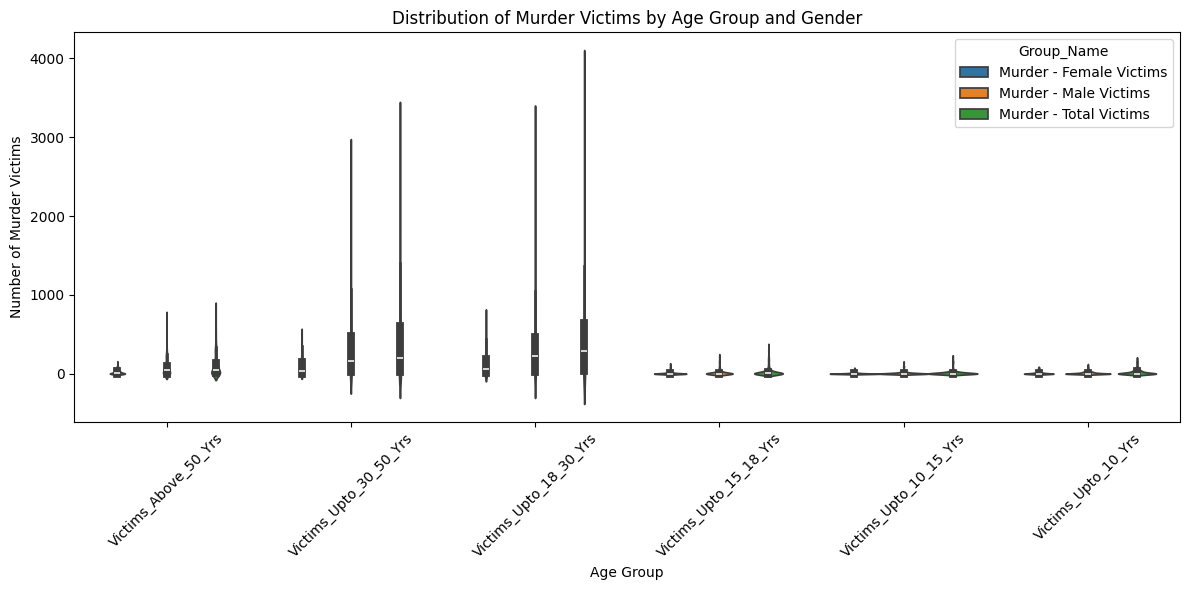

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the DataFrame to long-form format
melted_df = pd.melt(murder_df, id_vars='Group_Name', value_vars=['Victims_Above_50_Yrs', 'Victims_Upto_30_50_Yrs', 'Victims_Upto_18_30_Yrs',
                                'Victims_Upto_15_18_Yrs', 'Victims_Upto_10_15_Yrs', 'Victims_Upto_10_Yrs'],
                    var_name='Age_Group', value_name='Number_of_Murder_Victims')

plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='Age_Group', y='Number_of_Murder_Victims', hue='Group_Name')
plt.title('Distribution of Murder Victims by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Murder Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


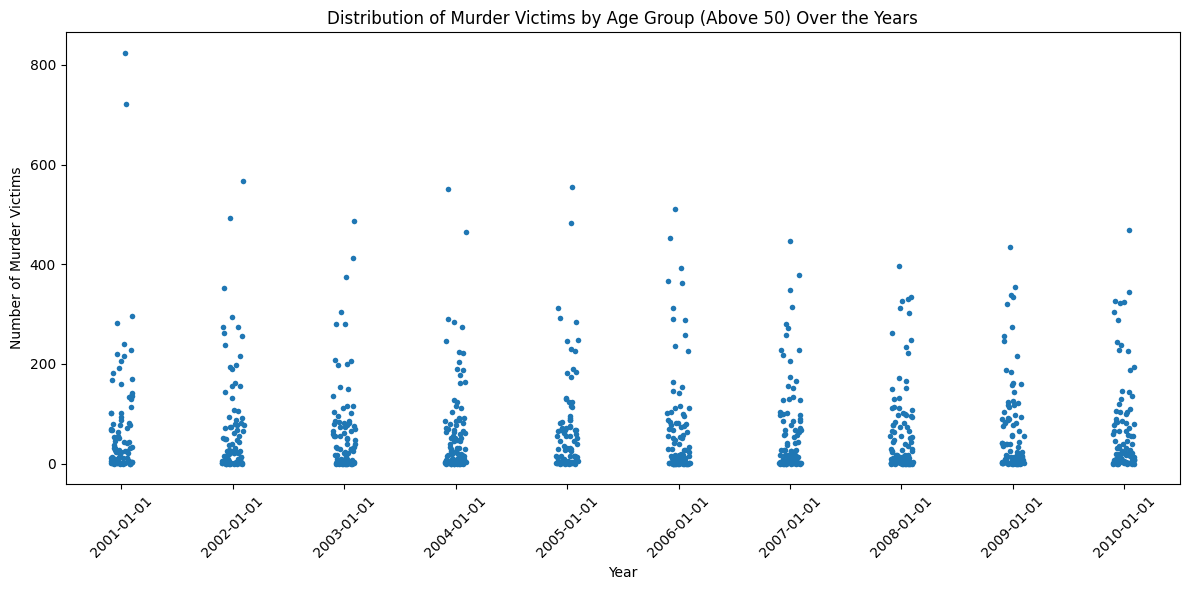

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=murder_df, x='Year', y='Victims_Above_50_Yrs', size=4)  # Adjust size as needed
plt.title('Distribution of Murder Victims by Age Group (Above 50) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Murder Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


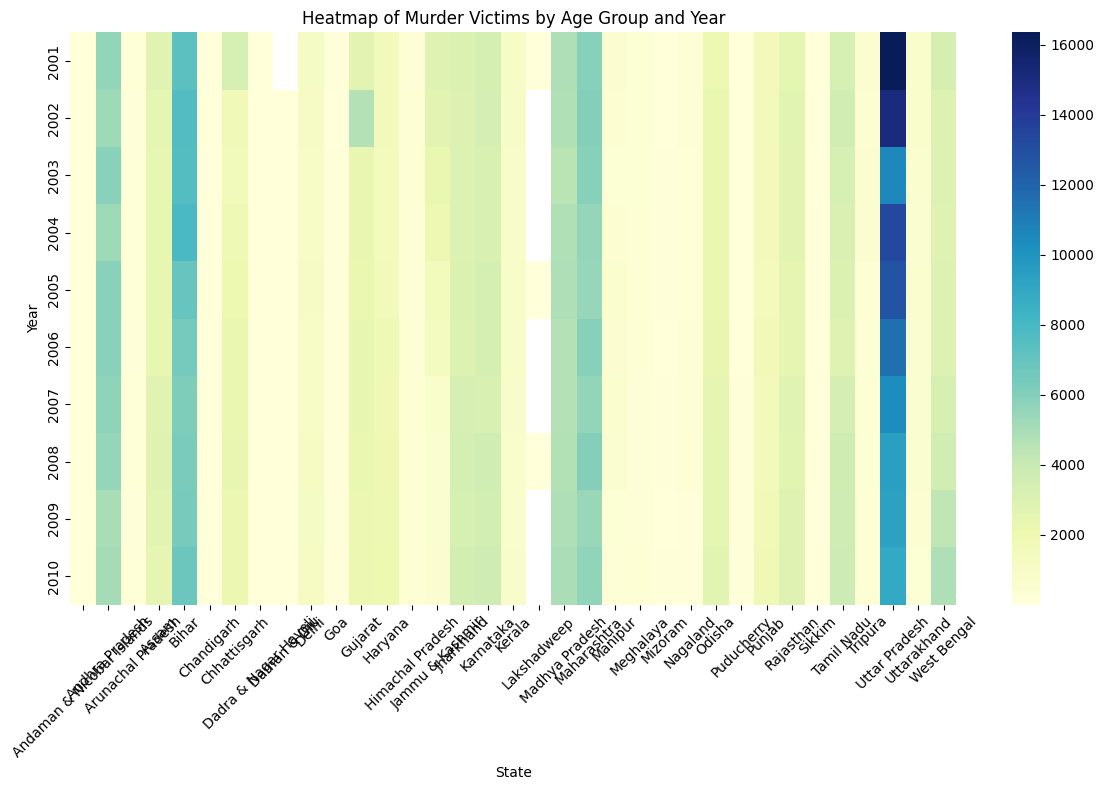

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(murder_df.pivot_table(index='Year', columns='Area_Name', values='Victims_Total', aggfunc='sum'), cmap='YlGnBu')
plt.title('Heatmap of Murder Victims by Age Group and Year')
plt.xlabel('State')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


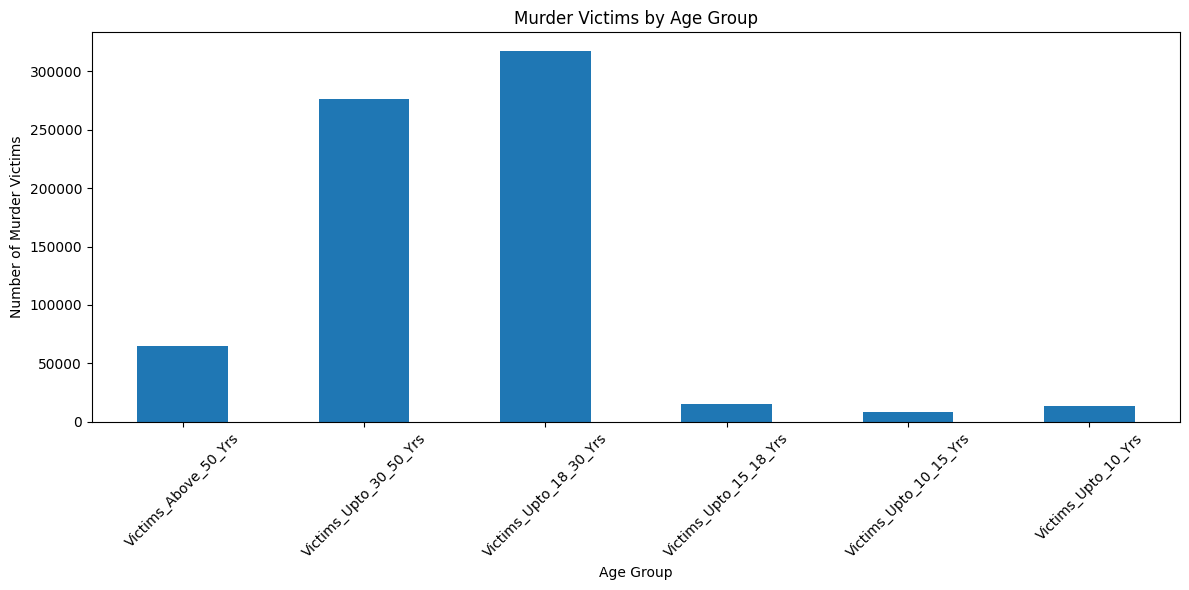

In [ ]:
age_group_totals = murder_df[['Victims_Above_50_Yrs', 'Victims_Upto_30_50_Yrs', 'Victims_Upto_18_30_Yrs',
                              'Victims_Upto_15_18_Yrs', 'Victims_Upto_10_15_Yrs', 'Victims_Upto_10_Yrs']].sum()

plt.figure(figsize=(12, 6))
age_group_totals.plot(kind='bar', stacked=True)
plt.title('Murder Victims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Murder Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


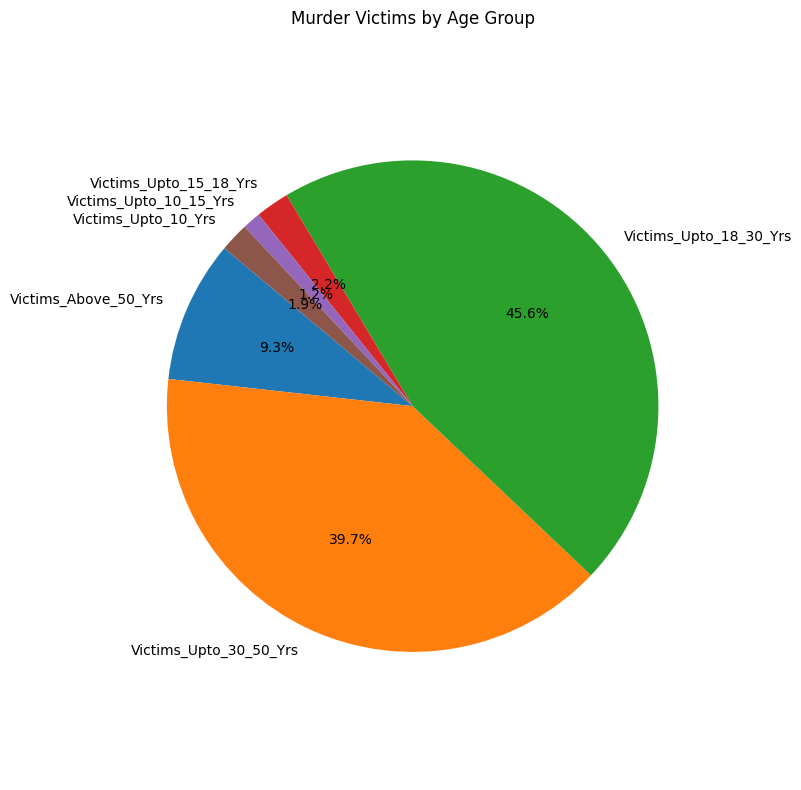

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Murder Victims by Age Group')
plt.axis('equal')
plt.tight_layout()
plt.show()


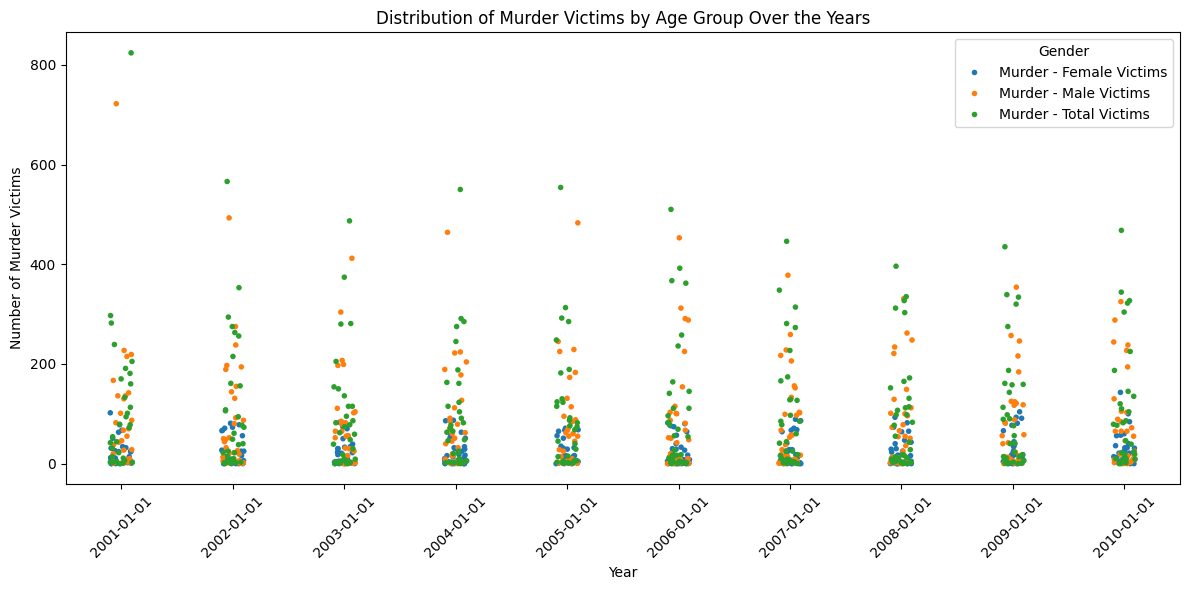

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




male_victims = murder_df[murder_df['Group_Name'] == 'Murder - Male Victims']
female_victims = murder_df[murder_df['Group_Name'] == 'Murder - Female Victims']


male_stats = male_victims.describe()

# female_stats = female_victims.describe()


# print("Summary Statistics for Male Victims:")
# print(male_stats)

# print("\nSummary Statistics for Female Victims:")
# print(female_stats)


plt.figure(figsize=(12, 6))
sns.stripplot(data=murder_df, x='Year', y='Victims_Above_50_Yrs', hue='Group_Name', size=4)
plt.title('Distribution of Murder Victims by Age Group Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Murder Victims')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


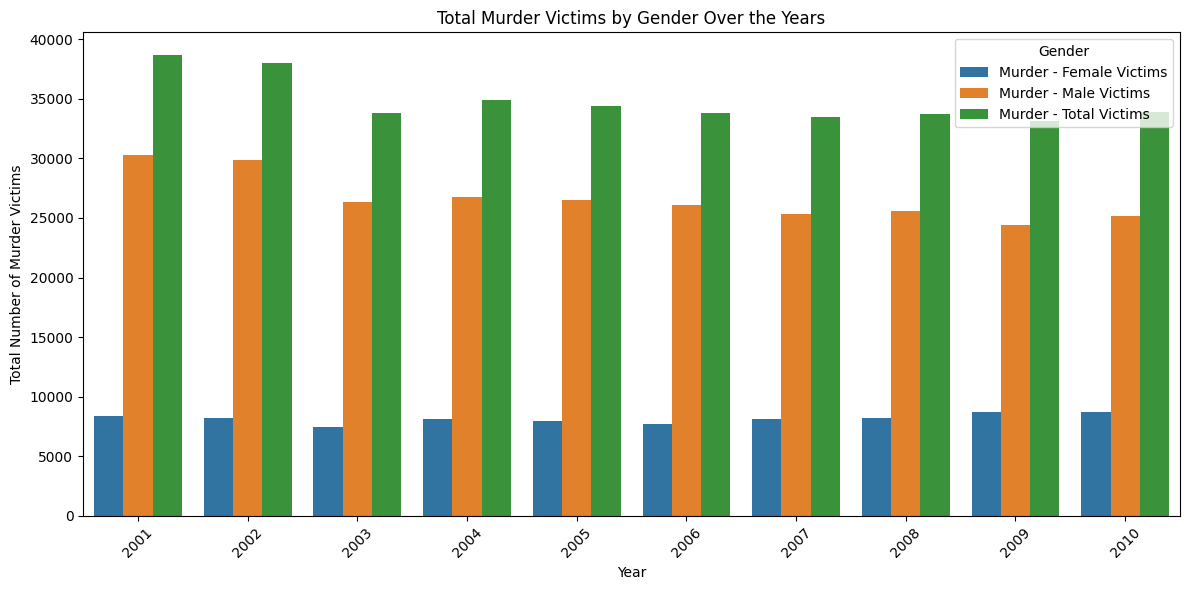

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Year' and 'Group_Name', and sum the 'Victims_Total' for each group
murder_df_grouped = murder_df.groupby(['Year', 'Group_Name'])['Victims_Total'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=murder_df_grouped, x='Year', y='Victims_Total', hue='Group_Name')
plt.title('Total Murder Victims by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Murder Victims')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Rape

In [11]:
data=dfs['VictimsRape']
data.head(5)

Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   
2                          2                          0   
3                          1                          1   
4                          0                          0   

   Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  
0                          0                      3                    0  
1                          0                      1                    0  
2                          0                      2                    0  
3                          0                      2                    0  
4                          0                      0                    0

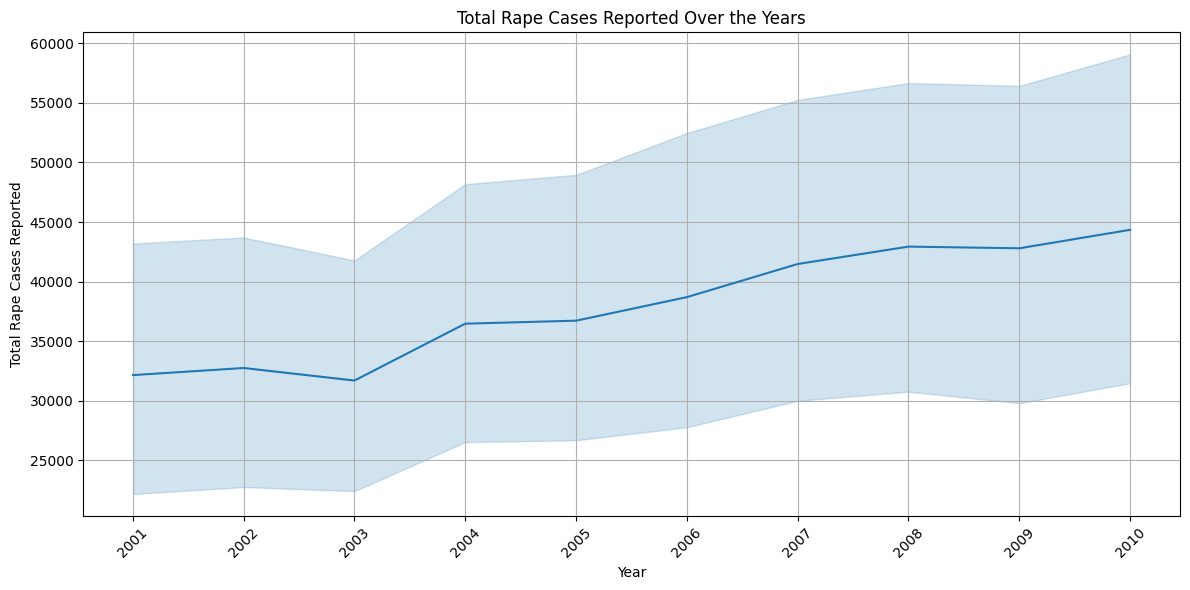

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data['Year'] = pd.to_datetime(data['Year'], format='%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Rape_Cases_Reported', estimator='sum')
plt.title('Total Rape Cases Reported Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Rape Cases Reported')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


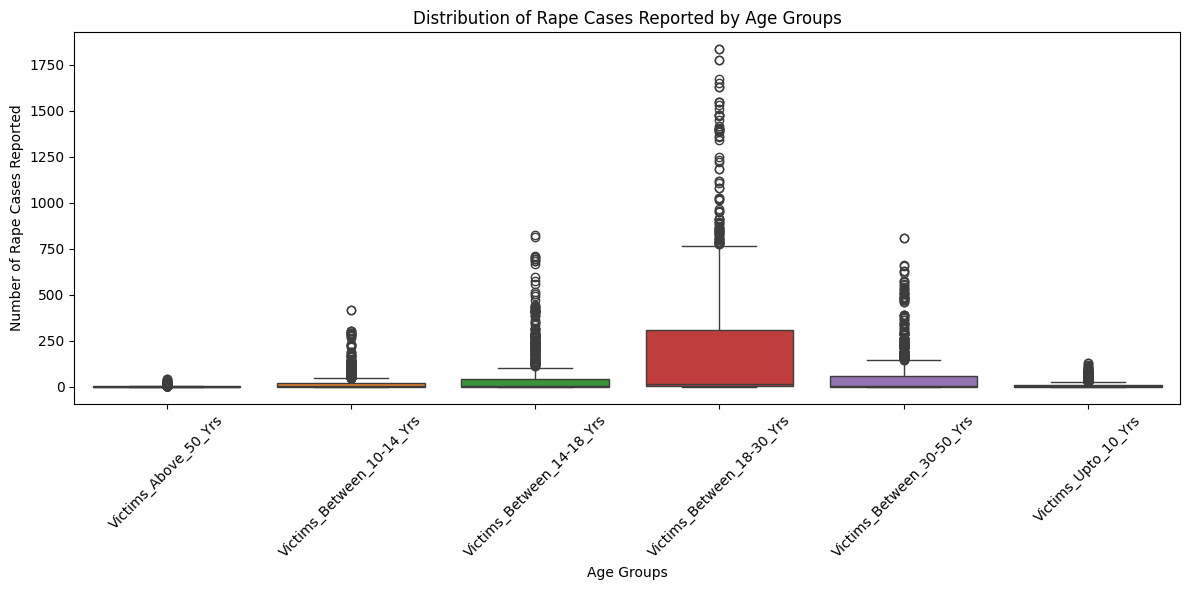

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
                       'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']])
plt.title('Distribution of Rape Cases Reported by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Rape Cases Reported')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


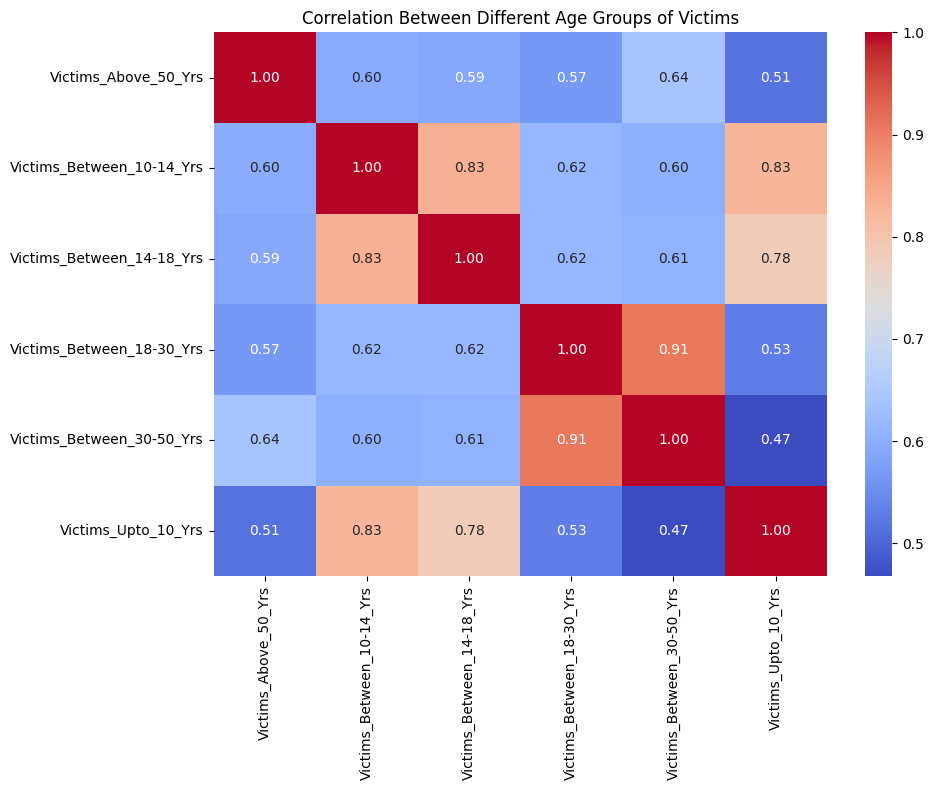

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

age_groups_corr = data[['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
                        'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(age_groups_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Different Age Groups of Victims')
plt.tight_layout()
plt.show()


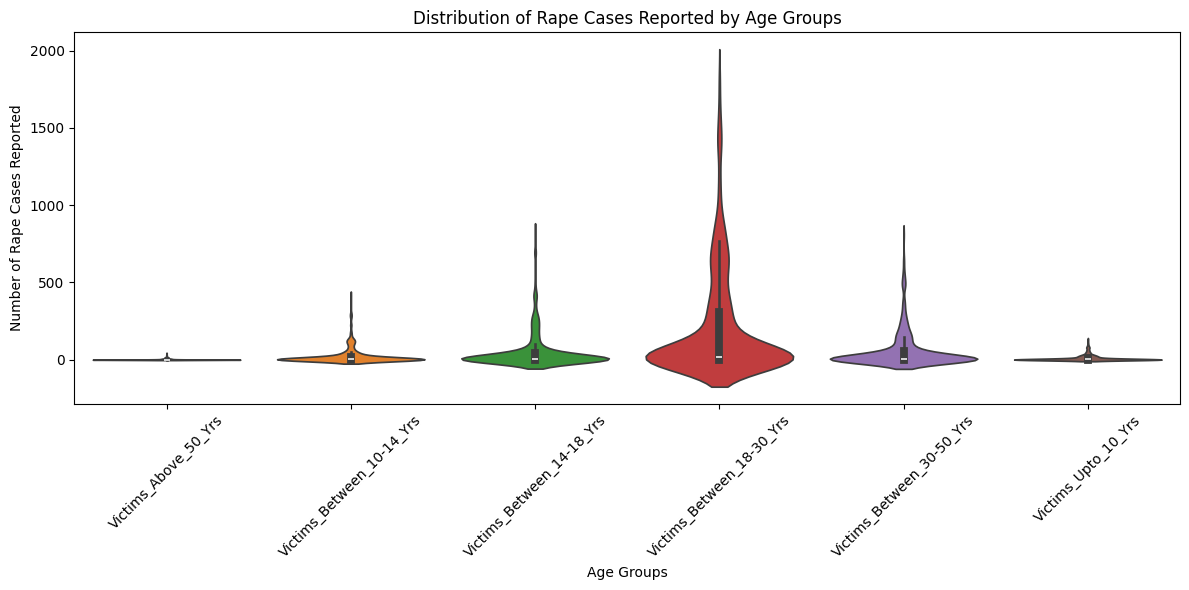

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=data[['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
                          'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']])
plt.title('Distribution of Rape Cases Reported by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Rape Cases Reported')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


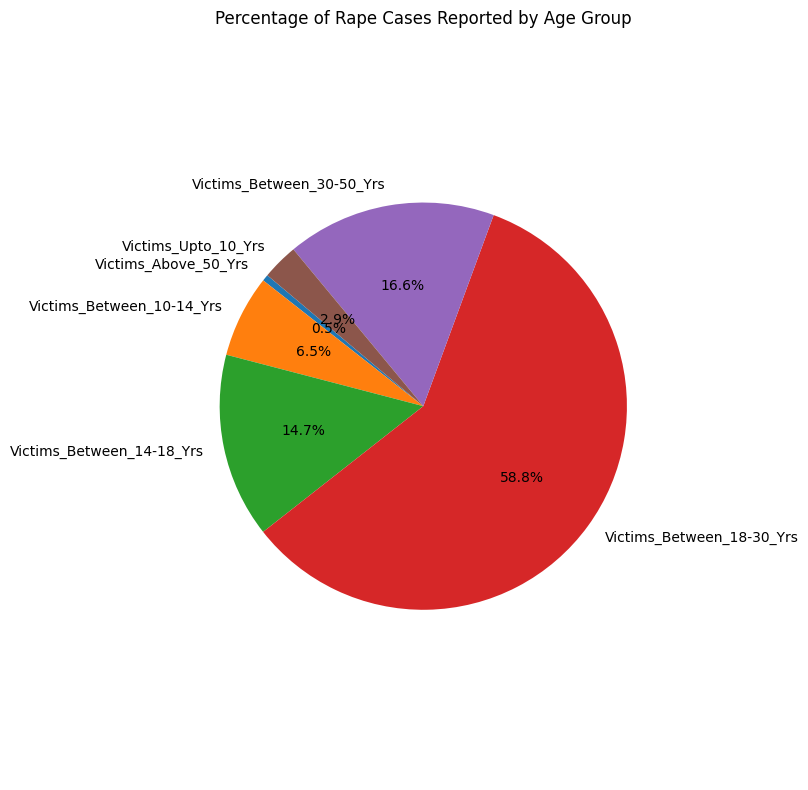

In [ ]:
import matplotlib.pyplot as plt

age_group_totals = data[['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
                         'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']].sum()
plt.figure(figsize=(8, 8))
plt.pie(age_group_totals, labels=age_group_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Rape Cases Reported by Age Group')
plt.axis('equal')
plt.tight_layout()
plt.show()


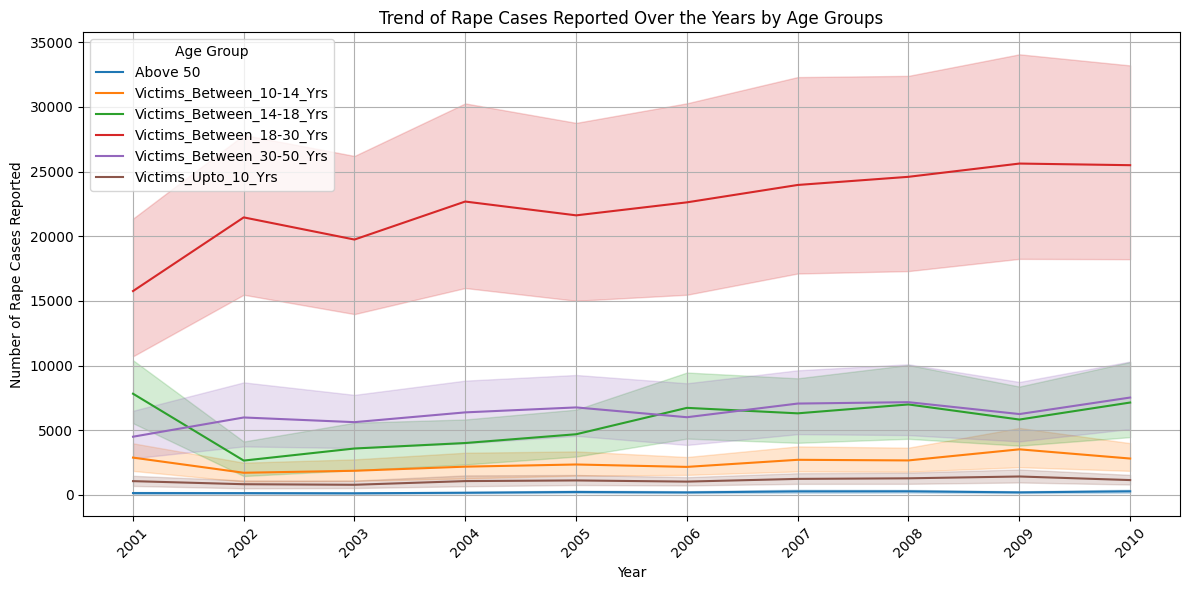

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

age_groups = ['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
              'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs']
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y=age_groups[0], estimator='sum', label='Above 50')
for group in age_groups[1:]:
    sns.lineplot(data=data, x='Year', y=group, estimator='sum', label=group)
plt.title('Trend of Rape Cases Reported Over the Years by Age Groups')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases Reported')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()


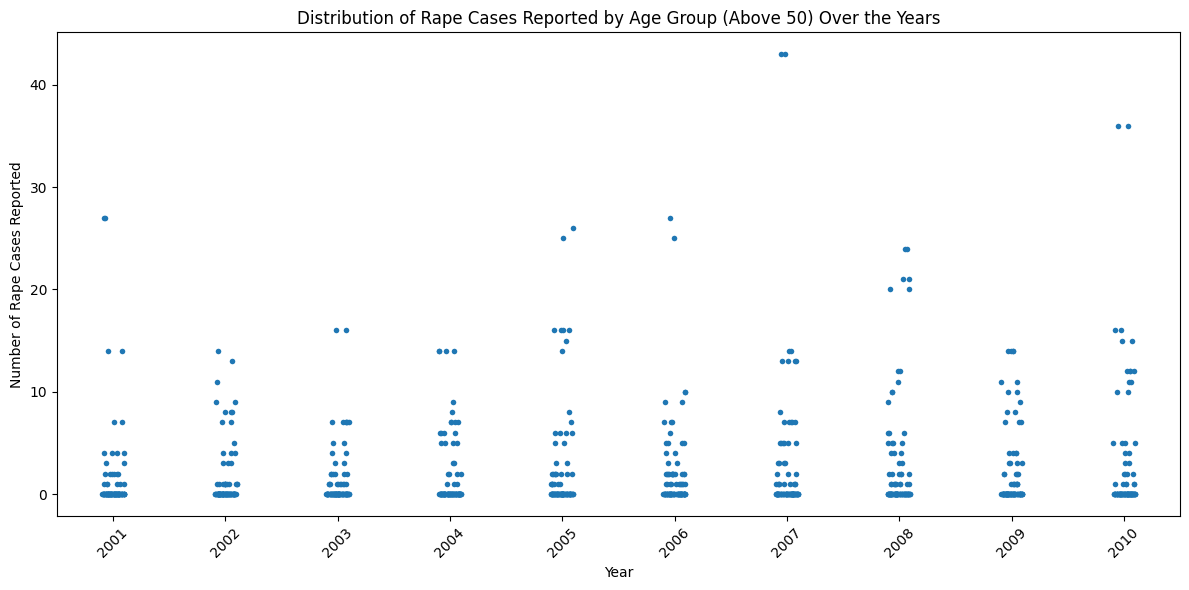

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.stripplot(data=data, x='Year', y='Victims_Above_50_Yrs', jitter=True, size=4)
plt.title('Distribution of Rape Cases Reported by Age Group (Above 50) Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases Reported')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


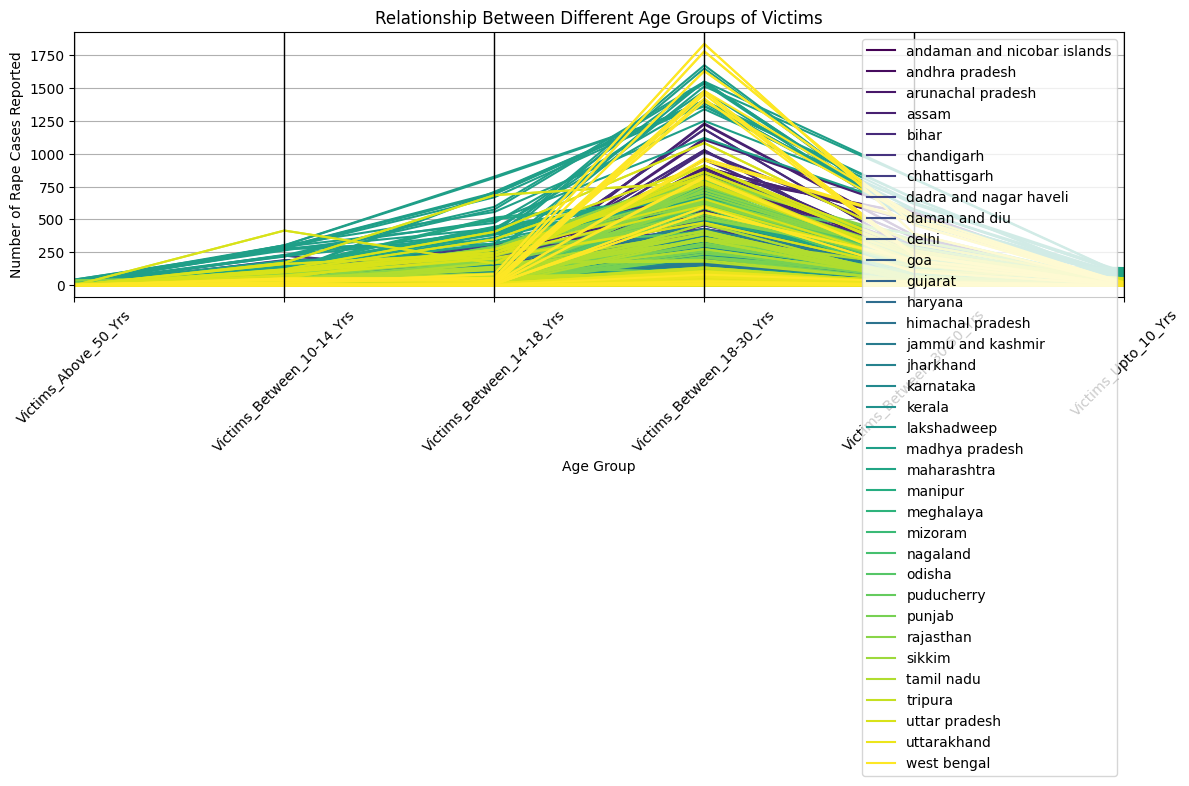

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
parallel_coordinates(data[['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
                           'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs', 'Area_Name']],
                     'Area_Name', colormap='viridis')
plt.title('Relationship Between Different Age Groups of Victims')
plt.xlabel('Age Group')
plt.ylabel('Number of Rape Cases Reported')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


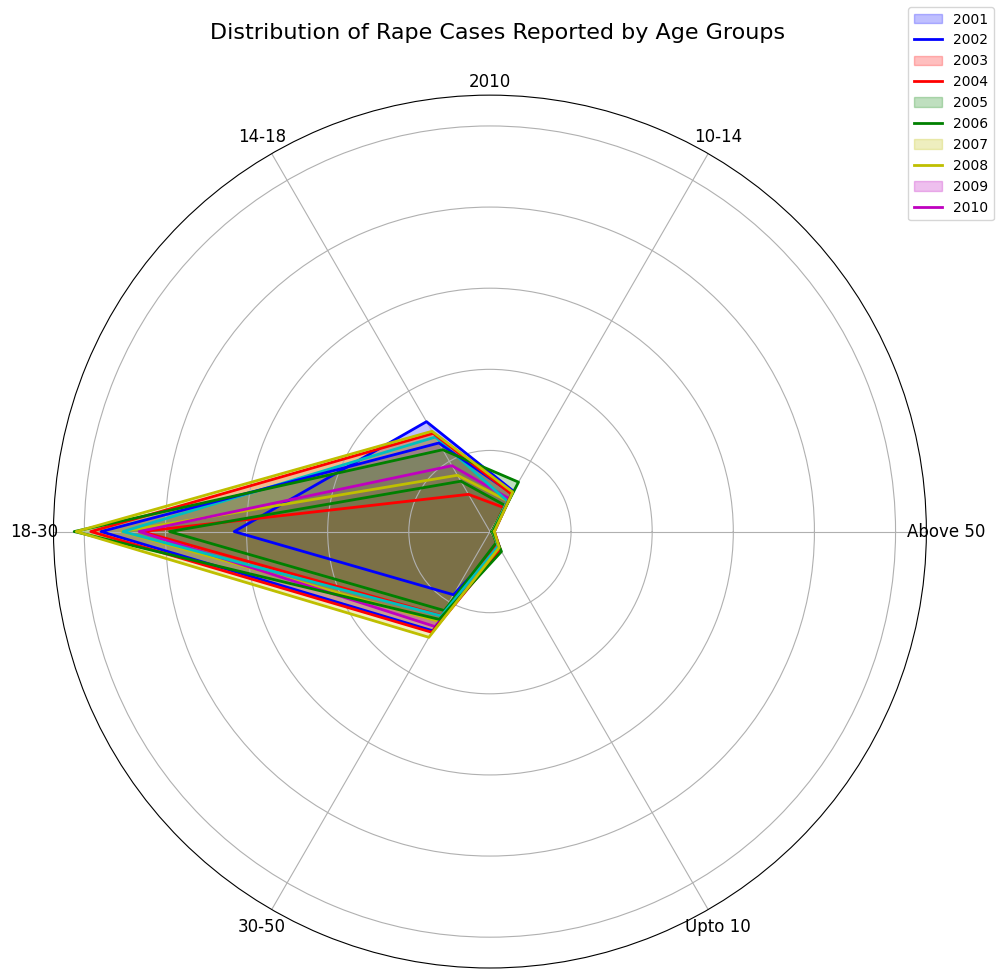

In [ ]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def radar_chart(df, title):
    labels=np.array(['Above 50', '10-14', '14-18', '18-30', '30-50', 'Upto 10'])
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    def _plot(ax, values, title, color):
        ax.fill(angles, values, color=color, alpha=0.25)
        ax.plot(angles, values, color=color, linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=12)  # Add labels for each angle
        ax.set_title(title)
        ax.grid(True)

    colors = ['b', 'r', 'g', 'y', 'm', 'c']
    for i, row in df.iterrows():
        values = row[1:].values.flatten().tolist()
        values += values[:1]
        _plot(ax=ax, values=values, title=row[0], color=colors[i % len(colors)])

    plt.figlegend(labels=df['Year'].tolist(), loc='upper right')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


radar_data = data.pivot_table(index='Year', values=['Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
                                                    'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
                                                    'Victims_Between_30-50_Yrs', 'Victims_Upto_10_Yrs'],
                              aggfunc='sum').reset_index()

radar_chart(radar_data, 'Distribution of Rape Cases Reported by Age Groups')


In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')


india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')

df['Area_Name'] = df['Area_Name'].str.lower().str.replace('&', 'and')
df['Area_Name'] = df['Area_Name'].replace({'odisha': 'orissa'})

# Group by state and find the total rape cases, most and least in a year (greater than -1)
total_cases_per_state = data.groupby('Area_Name')['Rape_Cases_Reported'].sum().reset_index()
max_cases_per_state = data.groupby(['Area_Name', 'Year'])['Rape_Cases_Reported'].sum().reset_index()
max_cases_per_state = max_cases_per_state.loc[max_cases_per_state.groupby('Area_Name')['Rape_Cases_Reported'].idxmax()]
min_cases_per_state = data[data['Rape_Cases_Reported'] > -1].groupby(['Area_Name', 'Year'])['Rape_Cases_Reported'].sum().reset_index()
min_cases_per_state = min_cases_per_state.loc[min_cases_per_state.groupby('Area_Name')['Rape_Cases_Reported'].idxmin()]


merged_data = india_map.merge(total_cases_per_state, how='left', left_on='STATE', right_on='Area_Name')
merged_data = merged_data.merge(max_cases_per_state[['Area_Name', 'Year', 'Rape_Cases_Reported']], how='left', on='Area_Name', suffixes=('', '_max'))
merged_data = merged_data.merge(min_cases_per_state[['Area_Name', 'Year', 'Rape_Cases_Reported']], how='left', on='Area_Name', suffixes=('', '_min'))



fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='Rape_Cases_Reported',
                    hover_name='STATE',
                    hover_data={'Rape_Cases_Reported': True, 'Year': True, 'Rape_Cases_Reported_max': True, 'Rape_Cases_Reported_min': True, 'Year_min': True},
                    color_continuous_scale='Viridis',
                    labels={'Rape_Cases_Reported':'Total Rape Cases', 'Year': 'Year', 'Rape_Cases_Reported_max': 'Most Cases in Year', 'Rape_Cases_Reported_min': 'Least Cases in Year', 'Year_min': 'Year with Least Cases'})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Rape Cases Heatmap in India', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


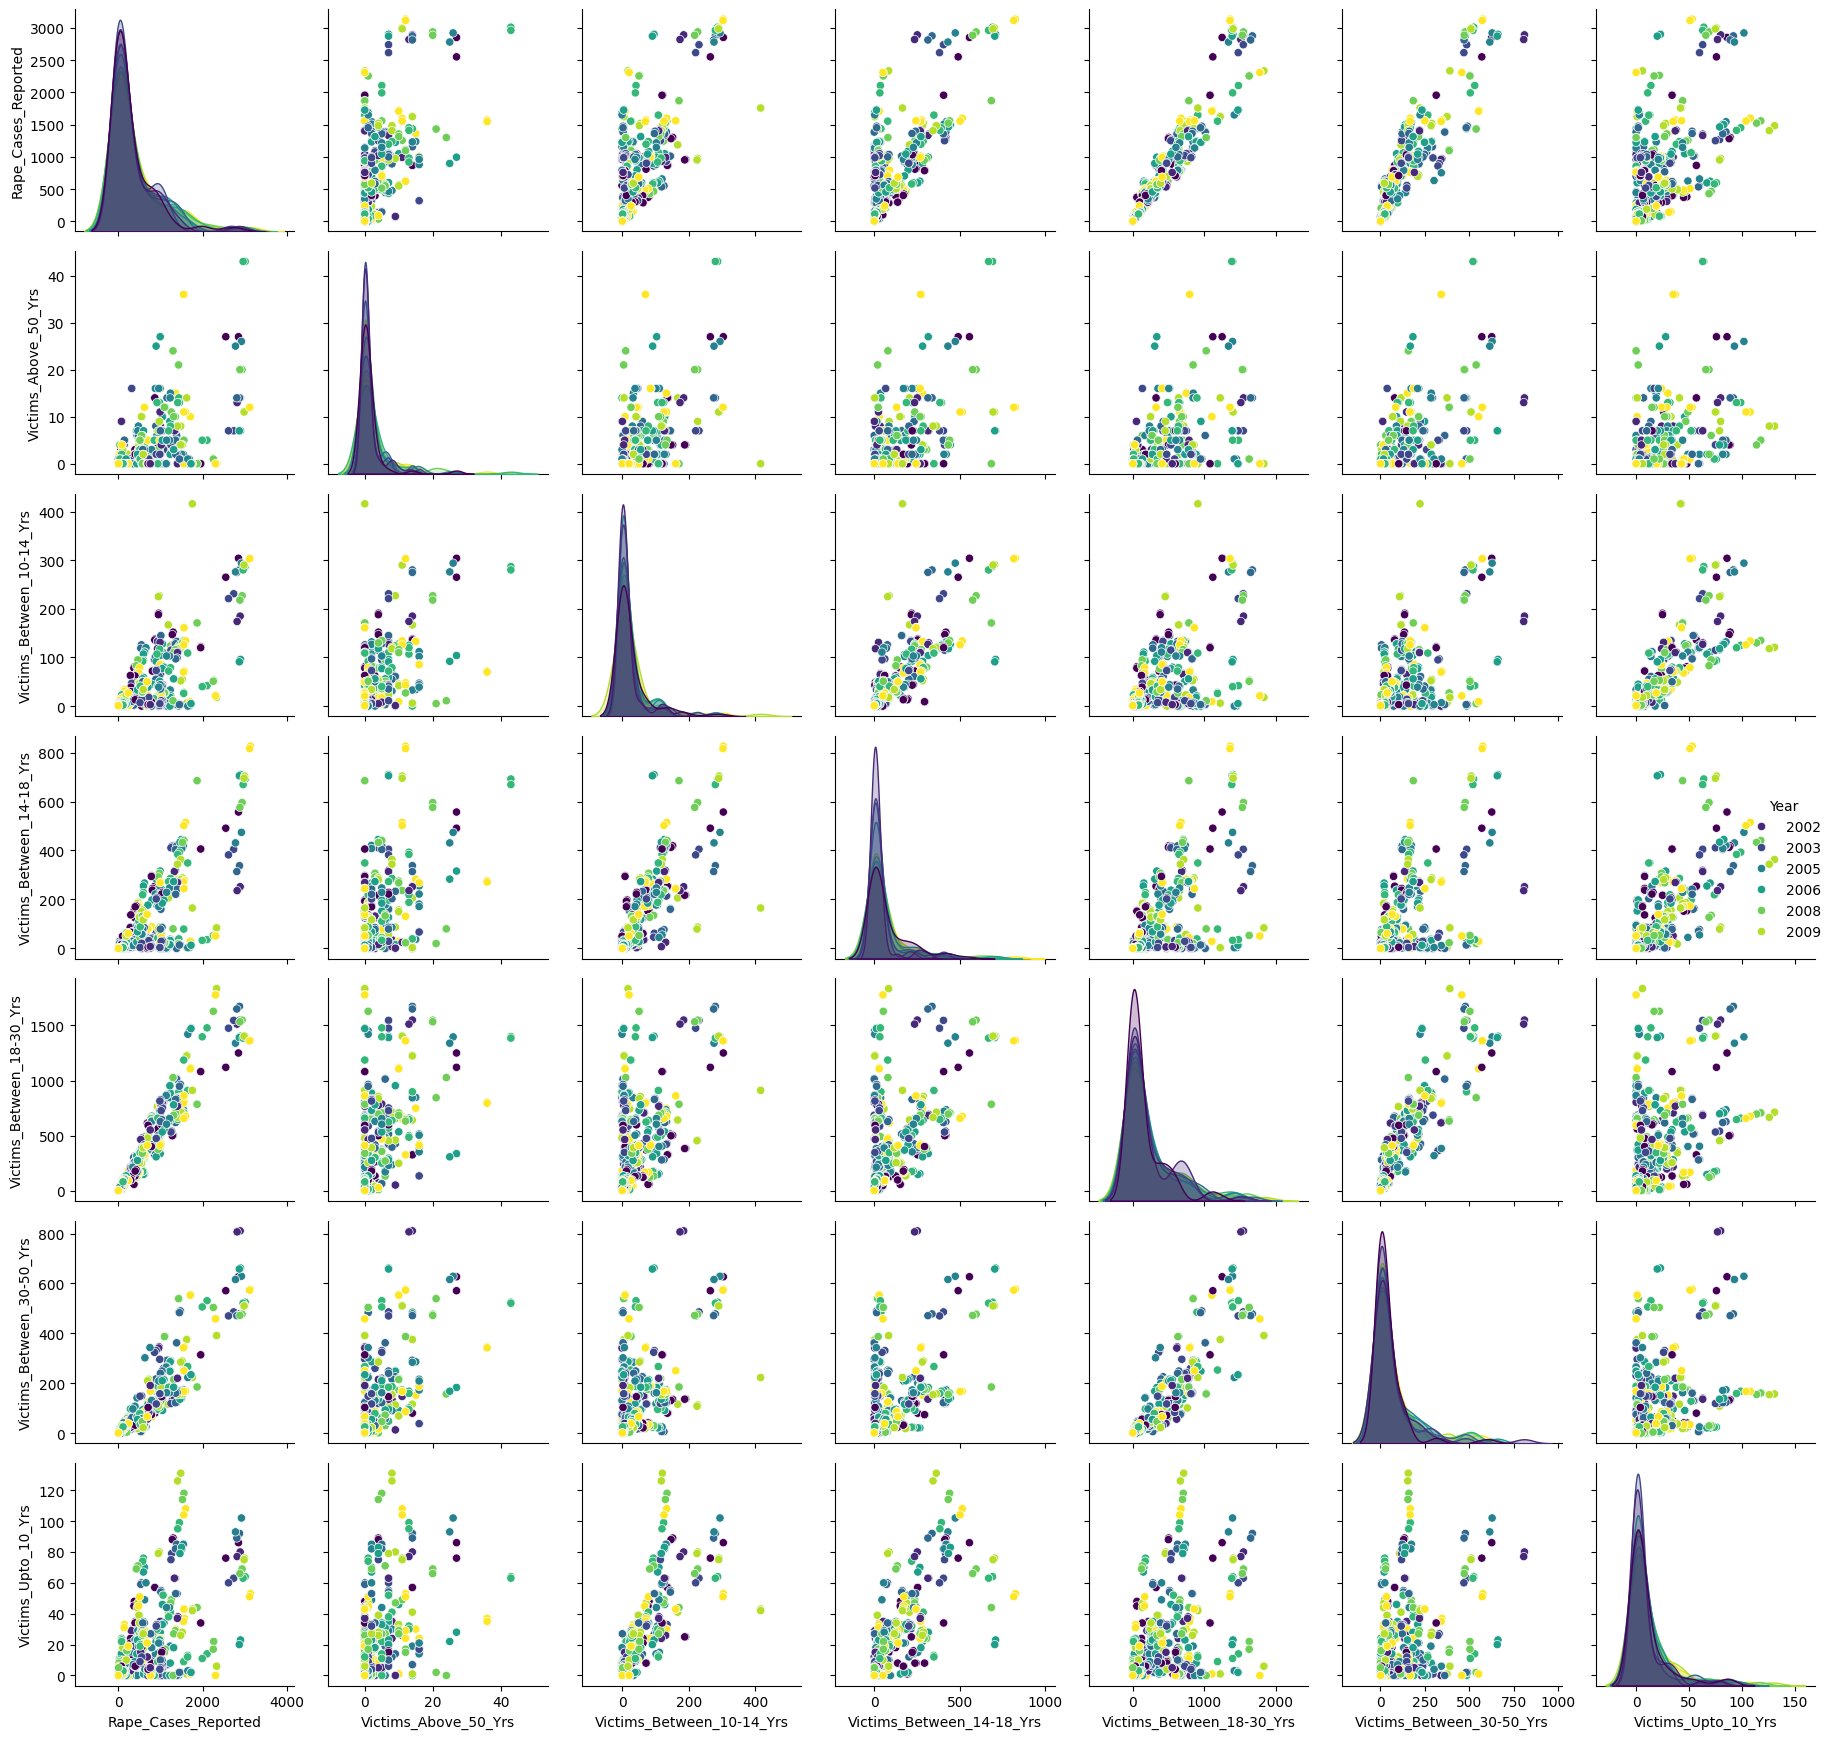

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


data['Year'] = data['Year'].dt.year

sns.pairplot(data=data[['Rape_Cases_Reported', 'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs',
                        'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs',
                        'Victims_Upto_10_Yrs', 'Year']], diag_kind='kde', hue='Year', palette='viridis')
plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px


grouped_data = data.groupby('Year').agg({
    'Rape_Cases_Reported': 'sum',
    'Victims_Above_50_Yrs': 'sum'
}).reset_index()


fig = px.scatter_3d(data_frame=grouped_data, x='Year', y='Rape_Cases_Reported', z='Victims_Above_50_Yrs',
                    color='Victims_Above_50_Yrs', size='Rape_Cases_Reported', opacity=0.7)
fig.update_layout(title='3D Scatter plot of Rape Cases Reported, Year, and Victims\' Age')
fig.update_layout(scene=dict(xaxis_title='Year', yaxis_title='Rape Cases Reported', zaxis_title='Victims Above 50 Years'))
fig.show()


In [ ]:
import plotly.express as px

subgroup_totals = data.groupby('Subgroup')['Rape_Cases_Reported'].sum()
fig = px.pie(subgroup_totals, values=subgroup_totals.values, names=subgroup_totals.index, hole=0.5)
fig.update_layout(title='Percentage of Total Rape Cases Reported by Subgroup')
fig.show()


# Fraud

In [16]:
fraud_data = dfs['SeriousFraud']
fraud_data.head(5)

Area_Name  Year                Group_Name Sub_Group_Name  \
0     Andhra Pradesh  2001  Serious Fraud - Cheating   2. Cheating    
1  Arunachal Pradesh  2001  Serious Fraud - Cheating   2. Cheating    
2              Assam  2001  Serious Fraud - Cheating   2. Cheating    
3              Bihar  2001  Serious Fraud - Cheating   2. Cheating    
4         Chandigarh  2001  Serious Fraud - Cheating   2. Cheating    

   Loss_of_Property_1_10_Crores  Loss_of_Property_10_25_Crores  \
0                           4.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   Loss_of_Property_25_50_Crores  Loss_of_Property_50_100_Crores  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   Loss_of_Property_Above_100_Crores  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0

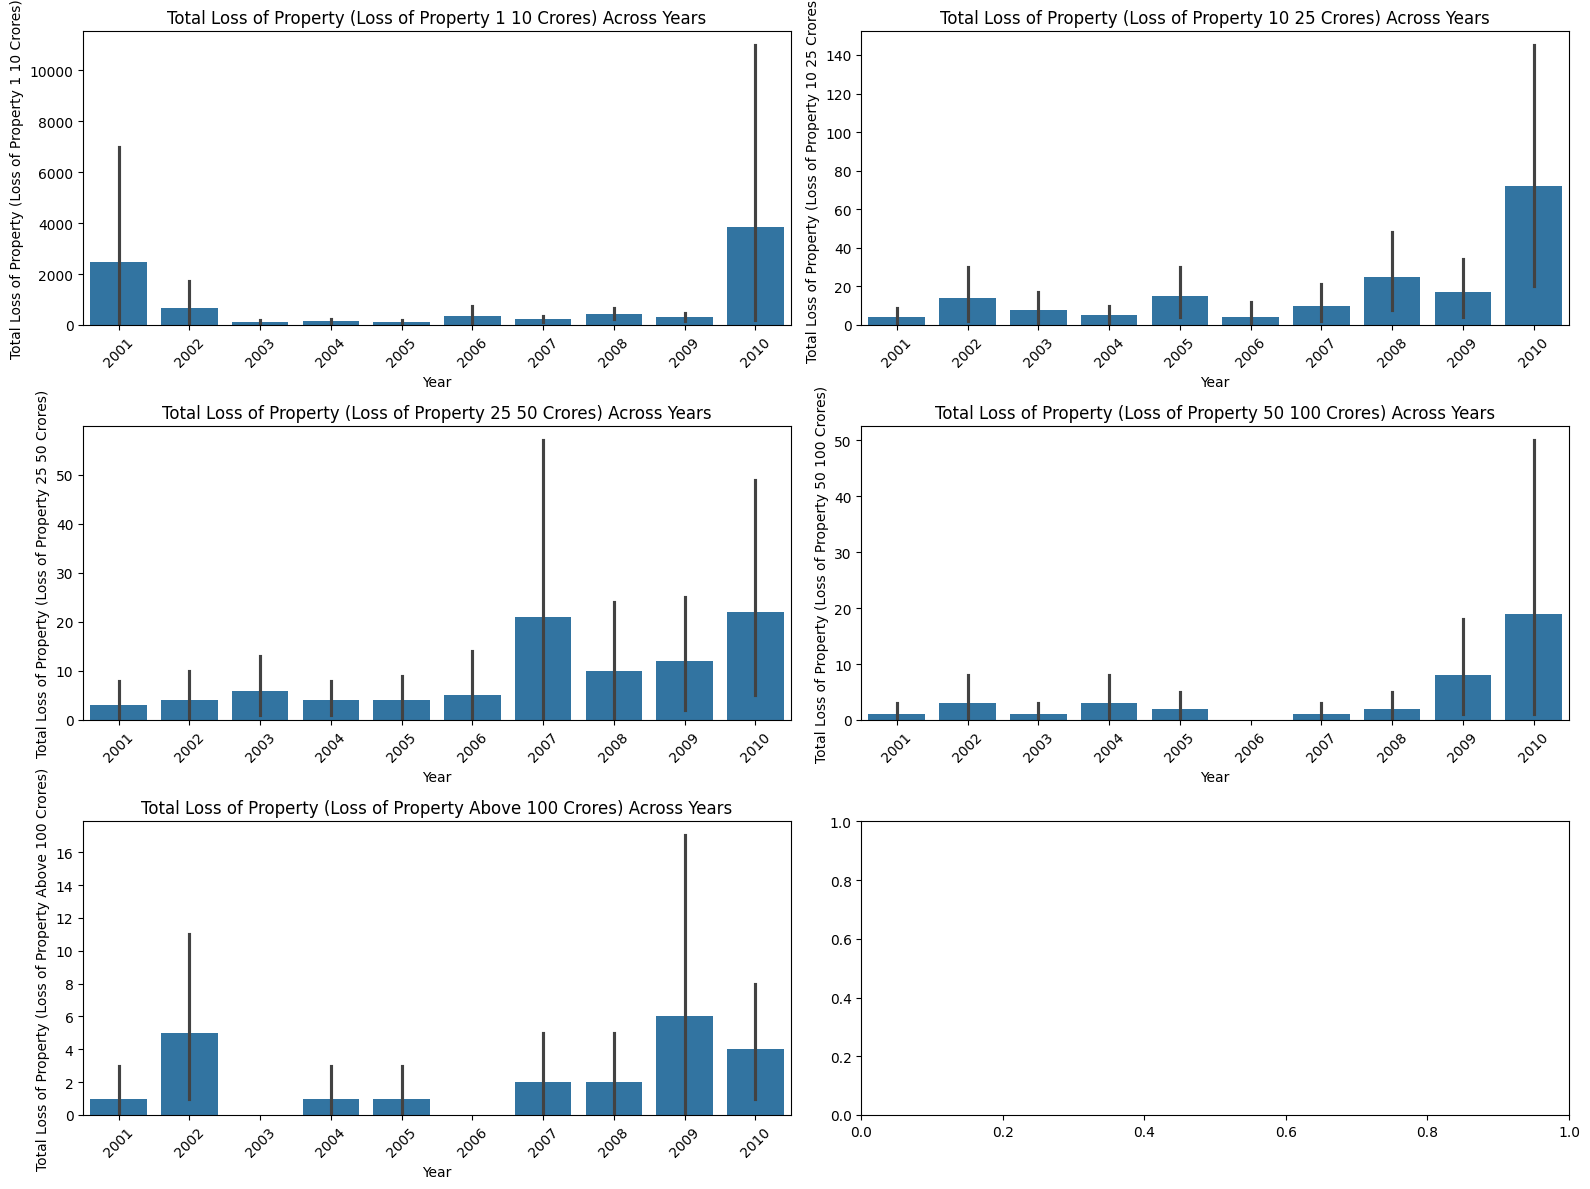

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = ['Loss_of_Property_1_10_Crores', 'Loss_of_Property_10_25_Crores',
           'Loss_of_Property_25_50_Crores', 'Loss_of_Property_50_100_Crores',
           'Loss_of_Property_Above_100_Crores']


num_categories = len(columns)
num_rows = (num_categories + 1) // 2
num_cols = min(2, num_categories)


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))

# Plot each category in a subplot
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.barplot(data=fraud_data, x='Year', y=column, estimator=sum, ax=axes[row, col])
    axes[row, col].set_title(f'Total Loss of Property Cases({column.replace("_", " ")}) Across Years')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(f'Total Loss of Property Cases({column.replace("_", " ")})')
    axes[row, col].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px


fraud_data['Total_Fraud_Cases'] = fraud_data[['Loss_of_Property_1_10_Crores',
                                              'Loss_of_Property_10_25_Crores',
                                              'Loss_of_Property_25_50_Crores',
                                              'Loss_of_Property_50_100_Crores',
                                              'Loss_of_Property_Above_100_Crores']].sum(axis=1)

# Pivot table to aggregate total loss of property by state and year
pivot_table = fraud_data.pivot_table(index='Year', columns='Area_Name', values='Total_Fraud_Cases', aggfunc='sum')


fig = px.area(pivot_table,
              title='Total Fraud Cases Across States Over Years',
              labels={'value': 'Total Fraud Cases', 'Year': 'Year'},
              template='plotly_white')

hover_template = '<br>State: %{fullData.name}<br>Year: %{x}<br>Total Fraud Cases: %{y}'


fig.update_traces(hovertemplate=hover_template)

fig.update_layout(legend_title='State')

fig.show()


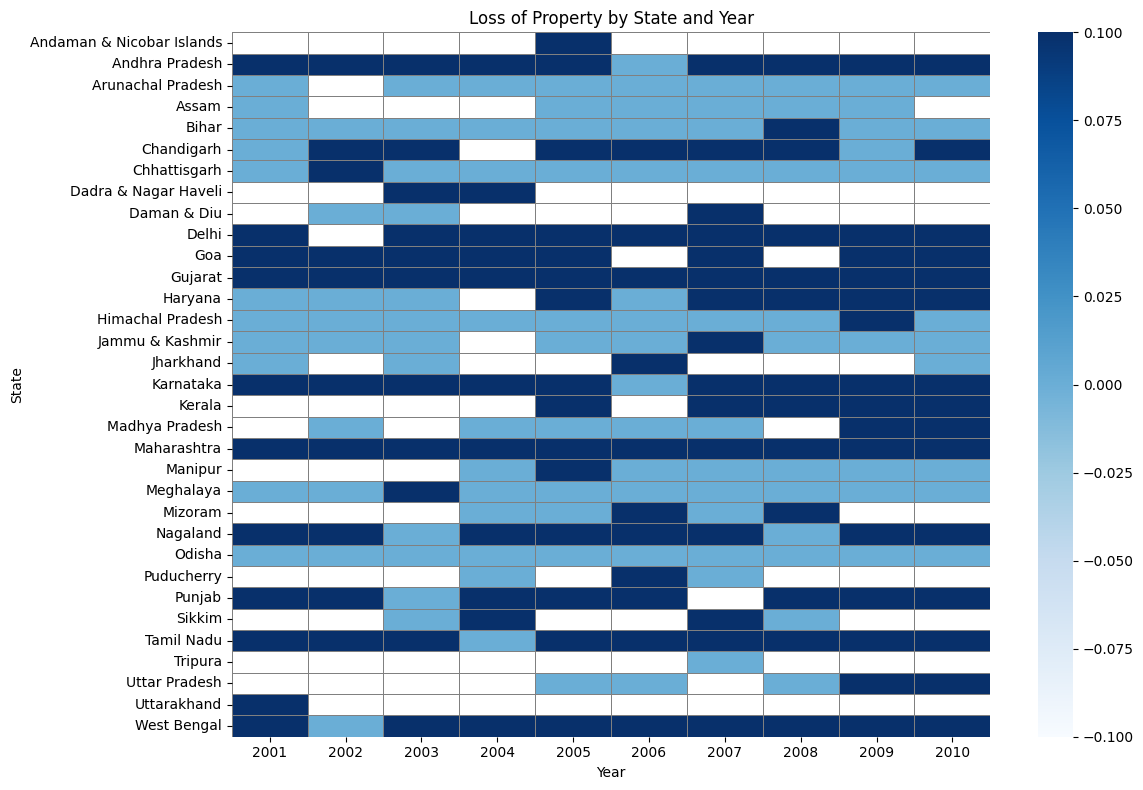

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


pivot_table = fraud_data.pivot_table(index='Area_Name', columns='Year', values='Loss_of_Property_1_10_Crores', aggfunc='sum')


vmin = pivot_table.values.min()
vmax = pivot_table.values.max()

# Heatmap with adjusted color range
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', linewidths=0.5, linecolor='gray', vmin=vmin, vmax=vmax)
plt.title('Loss of Property by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()


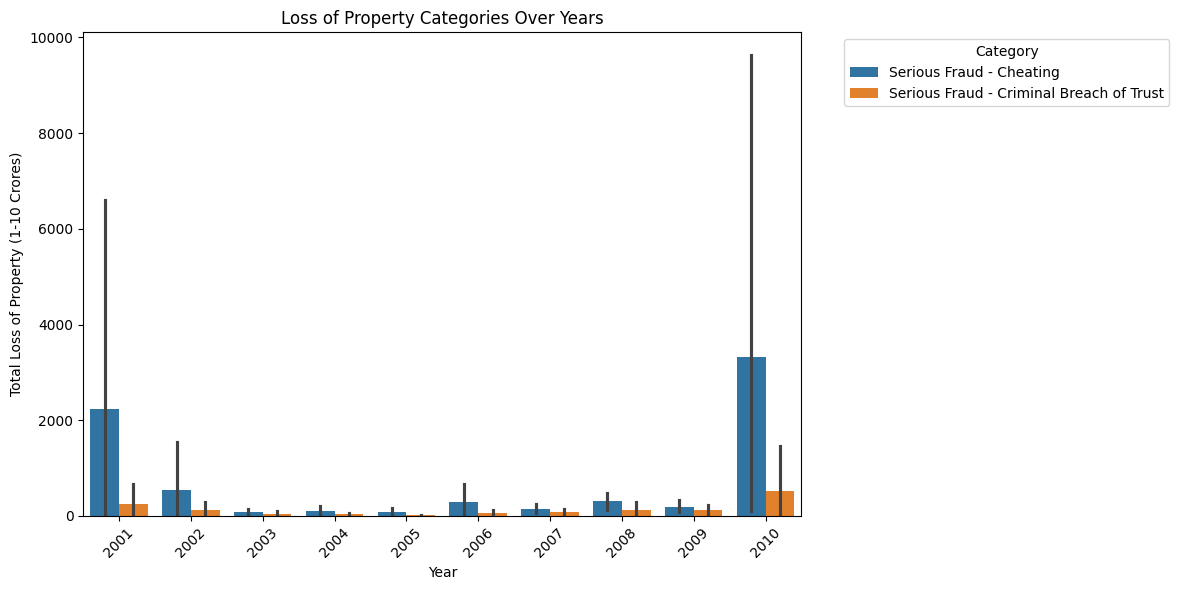

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_data, x='Year', y='Loss_of_Property_1_10_Crores', hue='Group_Name', estimator=sum)
plt.title('Loss of Property Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Total Loss of Property (1-10 Crores)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


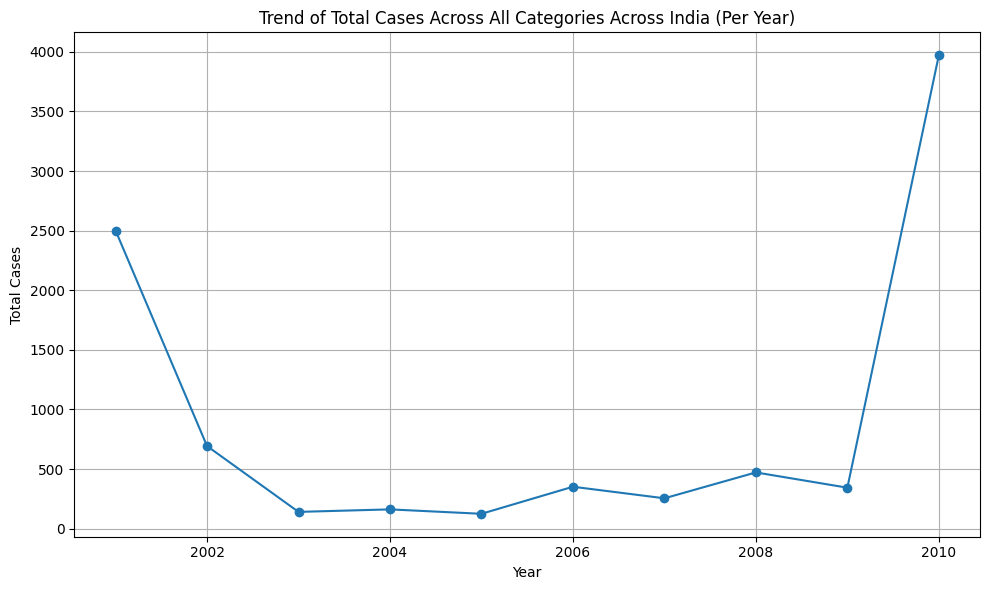

In [ ]:
import matplotlib.pyplot as plt

# Pivot table to aggregate total cases by year
total_cases_per_year = fraud_data.pivot_table(index='Year', values=categories, aggfunc='sum').sum(axis=1)

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(total_cases_per_year.index, total_cases_per_year.values, marker='o', linestyle='-')
plt.title('Trend of Total Cases Across All Categories Across India (Per Year)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import numpy as np

india_map = gpd.read_file('/content/drive/MyDrive/DV/mini_project/india_ds.shp')
fraud_data['Total_Fraud_Cases'] = fraud_data[['Loss_of_Property_1_10_Crores',
                                              'Loss_of_Property_10_25_Crores',
                                              'Loss_of_Property_25_50_Crores',
                                              'Loss_of_Property_50_100_Crores',
                                              'Loss_of_Property_Above_100_Crores']].sum(axis=1)
# Preprocessing state names to ensure consistency
india_map['STATE'] = india_map['STATE'].str.lower().str.replace('&', 'and')
fraud_data['Area_Name'] = fraud_data['Area_Name'].str.lower().str.replace('&', 'and')
fraud_data['Area_Name'] = fraud_data['Area_Name'].replace({'odisha': 'orissa'})

# Create a DataFrame for Rajasthan with 0 fraud cases
rajasthan_data = pd.DataFrame({'Area_Name': ['rajasthan'], 'Total_Fraud_Cases': [0]})


fraud_data = pd.concat([fraud_data, rajasthan_data], ignore_index=True)


merged_data = india_map.merge(fraud_data.groupby('Area_Name')['Total_Fraud_Cases'].sum().reset_index(),
                              how='left', left_on='STATE', right_on='Area_Name')


merged_data['Total_Fraud_Cases'] = np.log1p(merged_data['Total_Fraud_Cases'])


fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='Total_Fraud_Cases',
                    hover_name='STATE',
                    hover_data={'Total_Fraud_Cases': True},
                    color_continuous_scale='Viridis',
                    labels={'Total_Fraud_Cases': 'Total Fraud Cases (Log Scale)'})
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title='Total Fraud Cases in India (Log Scale)', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()
